### Breast Cancer Wisconsin (Diagnostic) 데이터셋

### 데이터 개요
- **유방암 진단을 위한 미세침 흡인 세포검사(FNA, Fine Needle Aspirate) 이미지**를 기반으로 생성된 데이터셋.
- 세포 핵의 특성을 나타내는 **30개의 수치형 변수** 포함.
- 총 **569개의 샘플**로 구성됨.
- 각 샘플은 **양성(Benign, B) 또는 악성(Malignant, M)** 으로 분류됨.
- **모든 특성 값은 유효 숫자 4자리**로 기록됨.

### 속성 정보 (Attribute Information)
1. **ID number**
2. **Diagnosis (진단 결과)**
 - `M` = **악성(Malignant)**
 - `B` = **양성(Benign)**
3. **3~32번째 속성**:  
 - 각 세포 핵의 **10가지 주요 특성**이 포함됨.
 - 각 특성의 **평균(Mean), 표준 오차(SE), 최악 값(Worst)** 총 30개의 수치형 변수로 표현됨.

### 데이터 탐색 및 전처리 과정 (Exploratory Data Analysis & Preprocessing)

모델 학습을 위한 최적의 데이터셋을 구성하기 위해 **데이터 탐색 및 전처리 과정**을 수행합니다. 데이터의 구조를 이해하고, 이상치 처리 및 Feature Selection을 통해 모델 성능을 최적화합니다.

### 1. 데이터 로드 및 기본 정보 확인

In [35]:
# 유방암 데이터셋(breastcancer.csv) 불러오기
import pandas as pd

df = pd.read_csv('breastcancer.csv')

In [36]:
# 데이터셋의 첫 5개 행 확인
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
# 진단(diagnosis) 컬럼의 고유값 확인
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

### 2. 데이터 전처리

In [38]:
# 진단(diagnosis) 컬럼을 숫자로 변환 (B → 0, M → 1)
def change_values_with_numbers(df, column_name='diagnosis'):
    mapping = {'B': 0, 'M': 1}
    df[column_name] = df[column_name].map(mapping)
    return df

df = change_values_with_numbers(df)

# 변환된 데이터 확인
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
# 데이터프레임의 전체 정보 확인 (컬럼명, 데이터 타입, 결측치 개수 등)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
# 불필요한 컬럼(id, Unnamed: 32) 제거
df = df.drop(columns=['id', 'Unnamed: 32'])

# 컬럼 제거 후 데이터 확인
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
# 각 컬럼별 결측치(NaN) 개수 확인
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [42]:
# 중복된 행 확인
df[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [43]:
# 데이터셋의 기초 통계 정보 확인 (수치형 변수 대상)
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 3. 유방암 데이터셋에서 diagnosis(진단 결과)와 각 Feature 간의 상관관계를 분석하여, 모델 성능에 중요한 영향을 미치는 주요 Feature를 파악

In [44]:
# diagnosis 컬럼과 다른 변수들의 상관계수 계산 후 내림차순 정렬
df.corr(numeric_only=True).sort_values(by='diagnosis', ascending=False)['diagnosis']

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

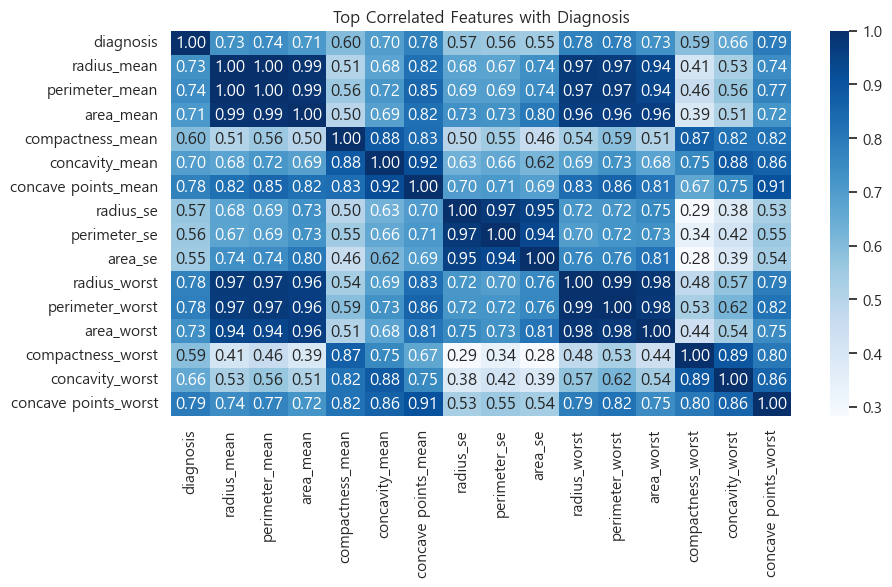

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 스타일 및 한글 폰트 설정
sns.set_theme(rc={'figure.figsize': (10, 5)}, style='white', font='Malgun Gothic')

def return_top_corr_features(df, num=0.5):
    """
    diagnosis 컬럼과 상관계수가 num 이상인 변수들만 선택하여 상관행렬 반환
    """
    corr_df = df.corr(numeric_only=True)  # 수치형 변수만 상관계수 계산
    top_corr_features_list = corr_df.loc[corr_df['diagnosis'] > num, 'diagnosis'].index.tolist()
    top_corr_features = df[top_corr_features_list].corr(numeric_only=True)  # 선택된 변수들 간 상관행렬 계산
    return top_corr_features

# diagnosis 컬럼과 상관계수 0.5 이상인 변수들 선택
top_corr_features = return_top_corr_features(df, 0.5)

# 히트맵 시각화
plt.title('Top Correlated Features with Diagnosis')
sns.heatmap(data=top_corr_features, cmap='Blues', annot=True, fmt=".2f")
plt.show()


### 4. 이상치 탐색 및 처리

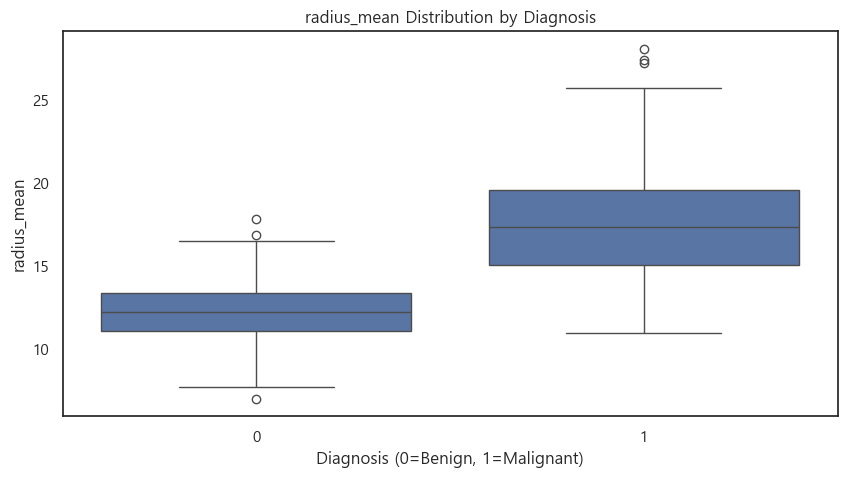

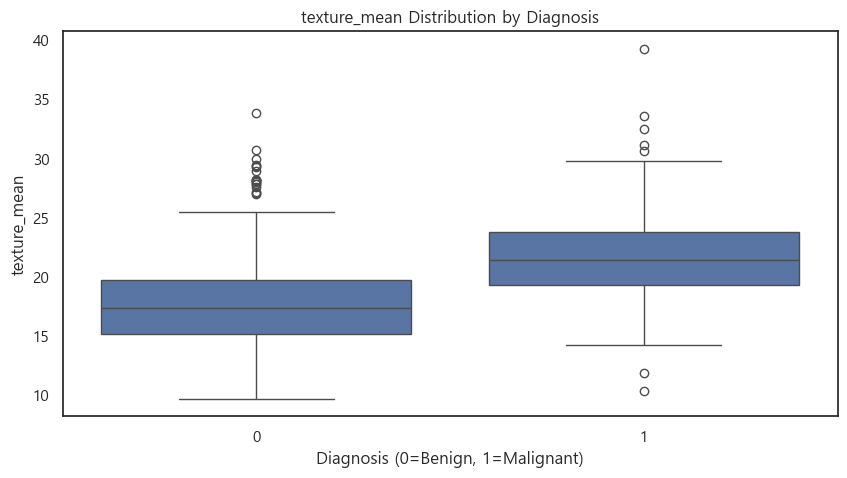

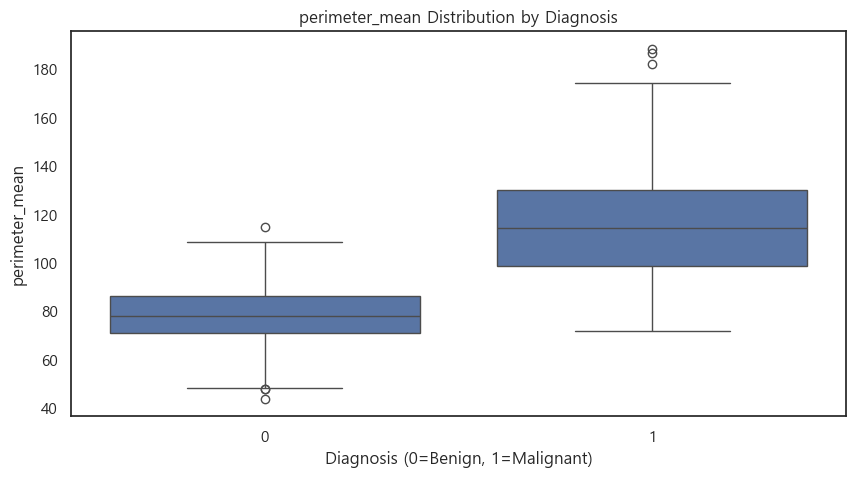

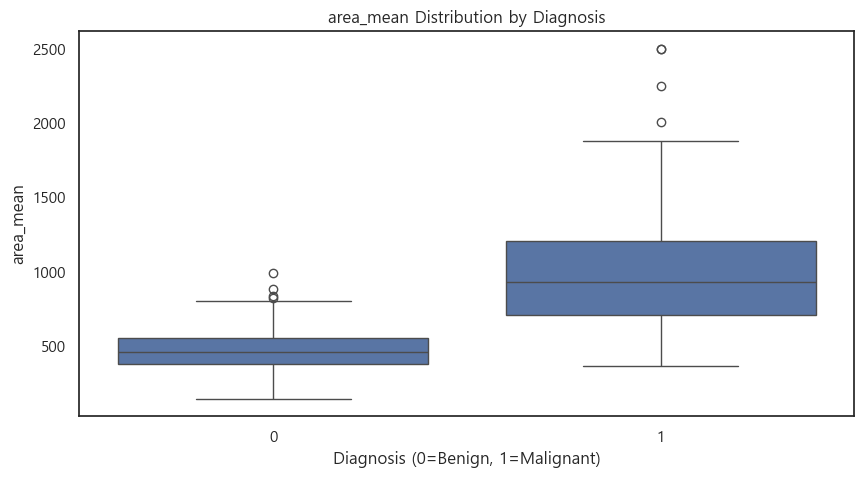

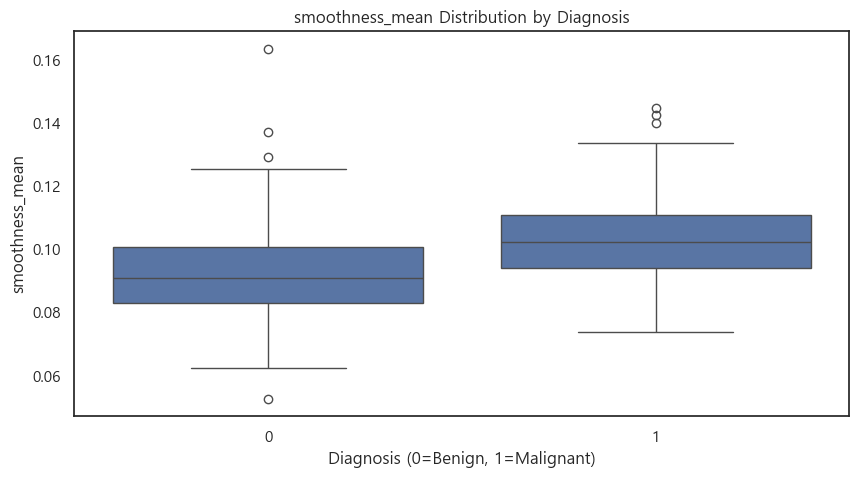

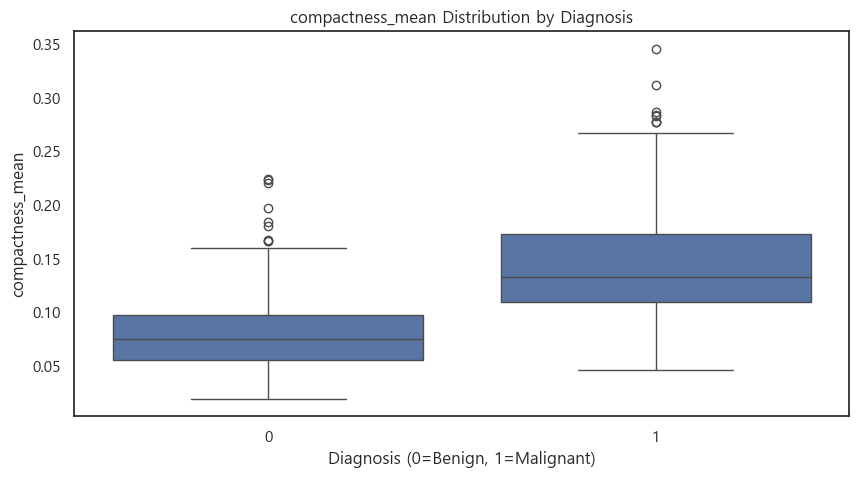

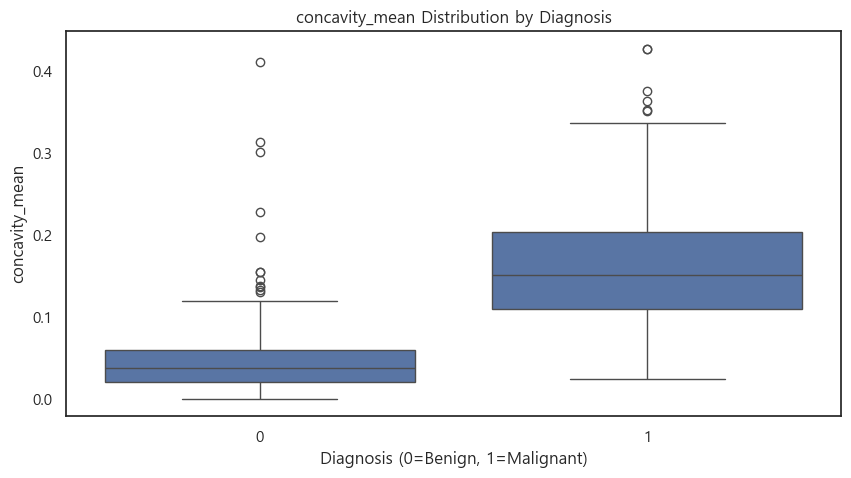

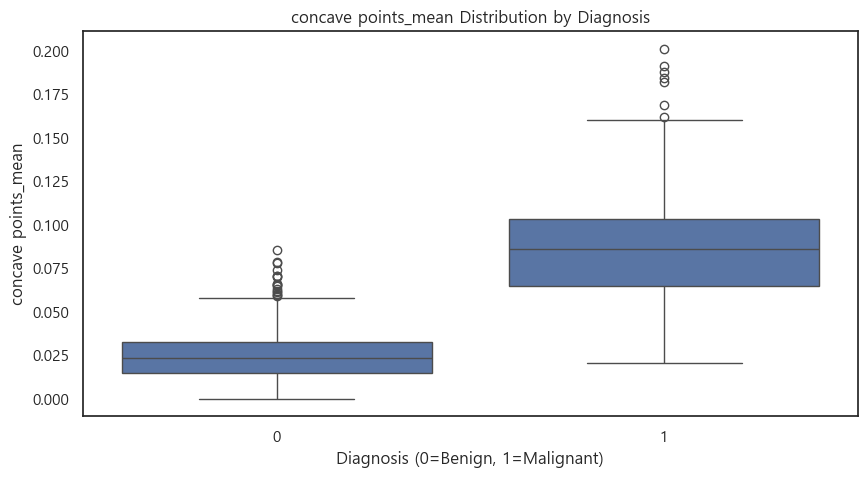

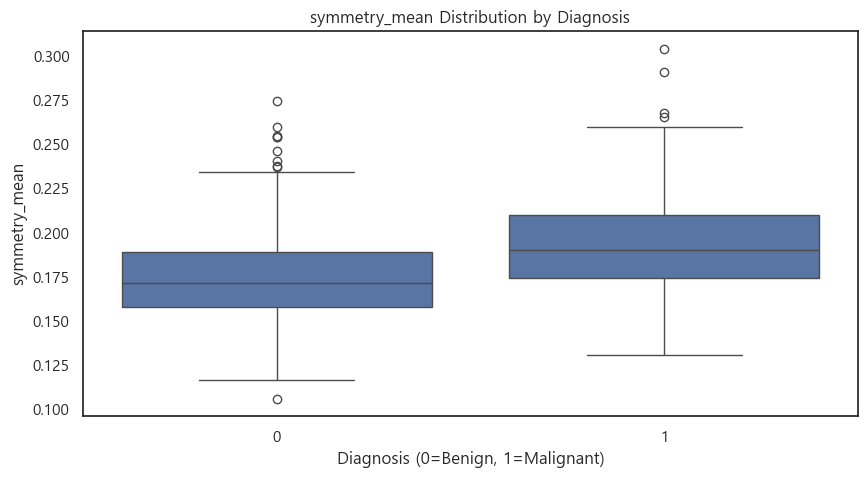

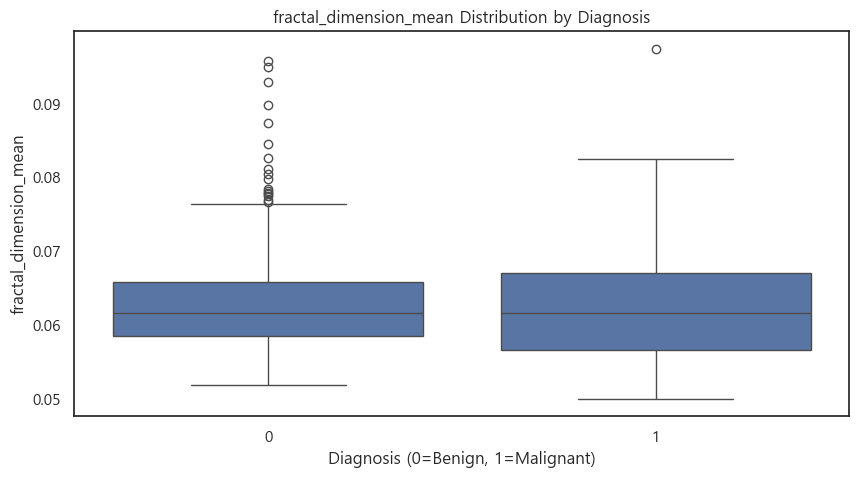

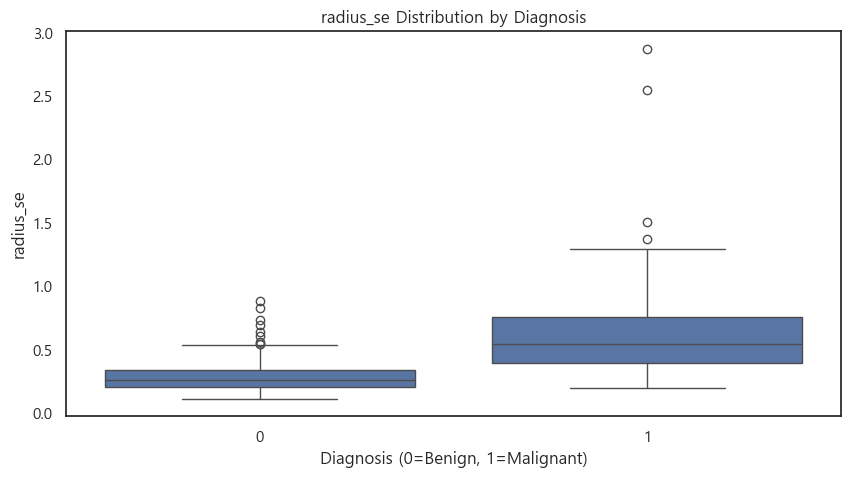

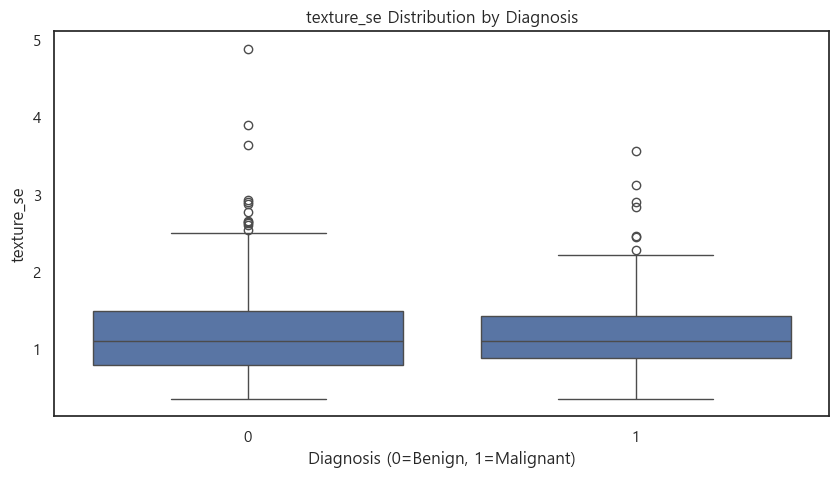

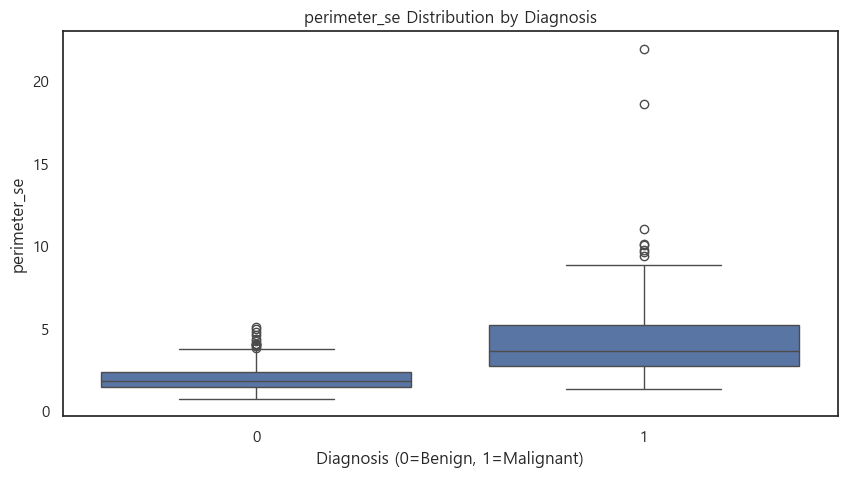

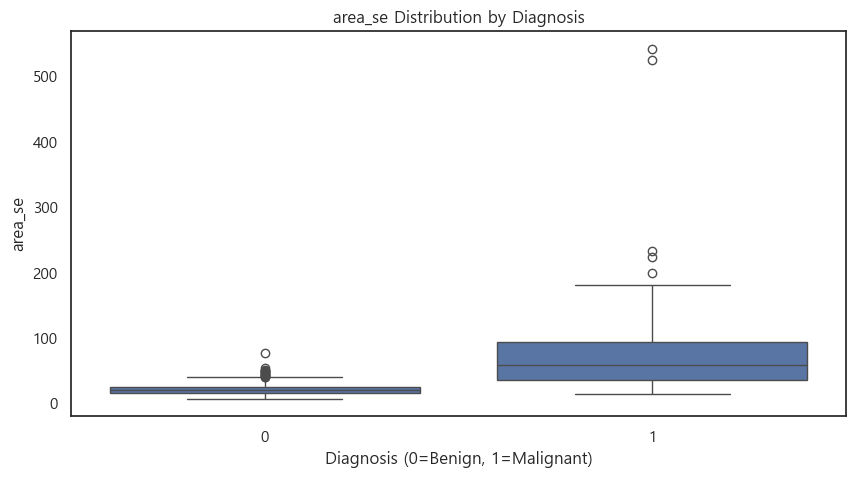

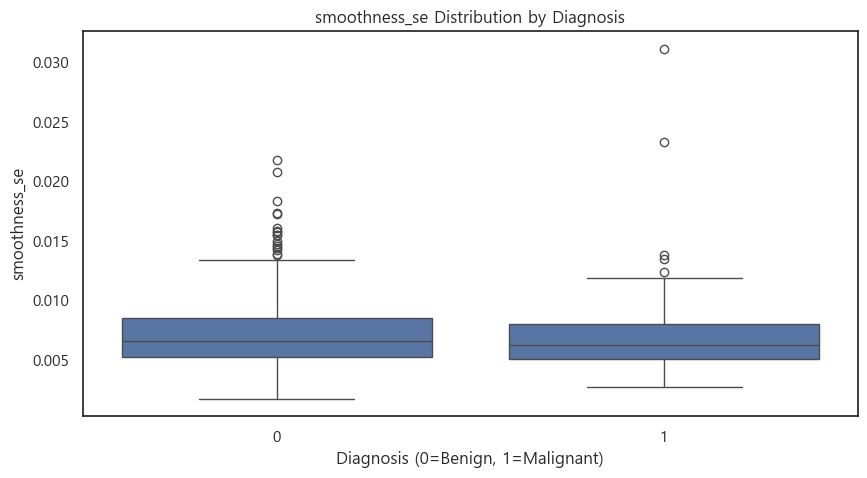

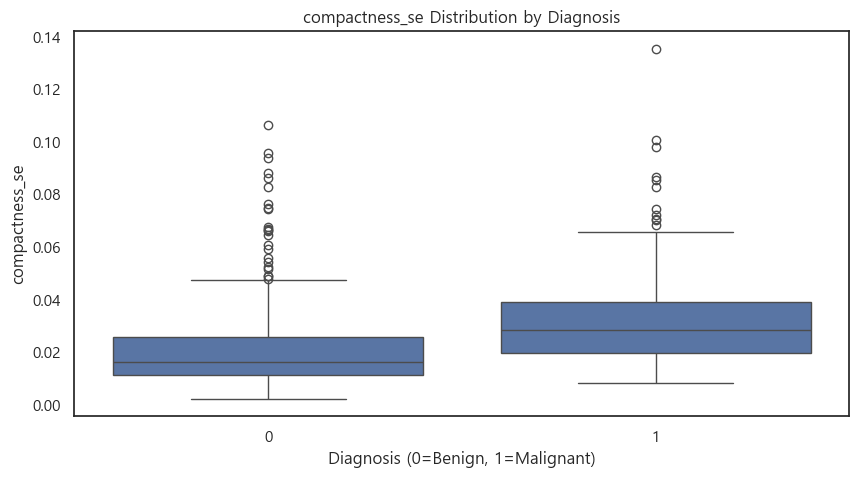

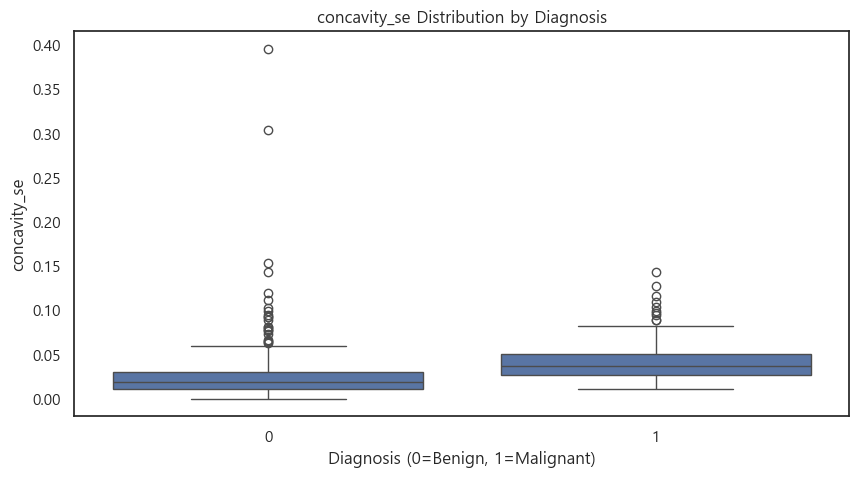

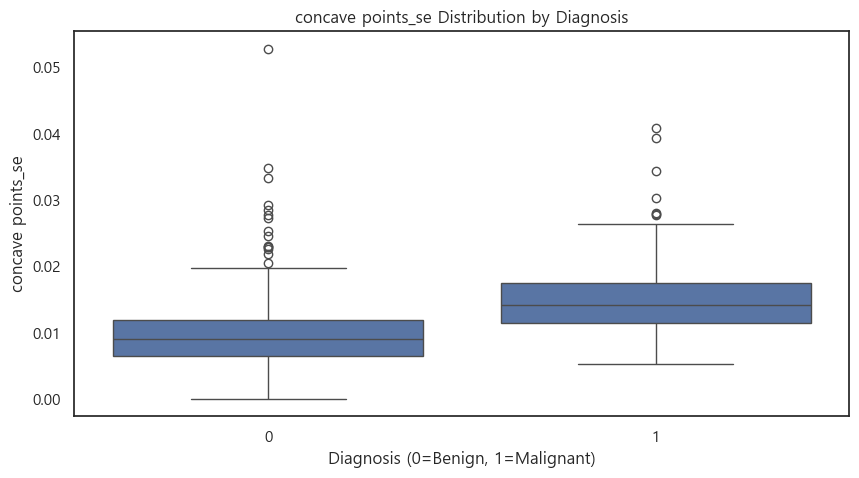

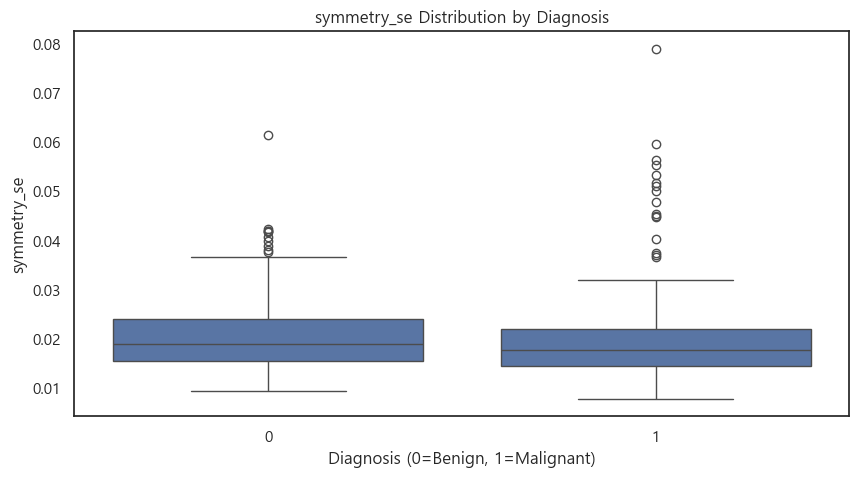

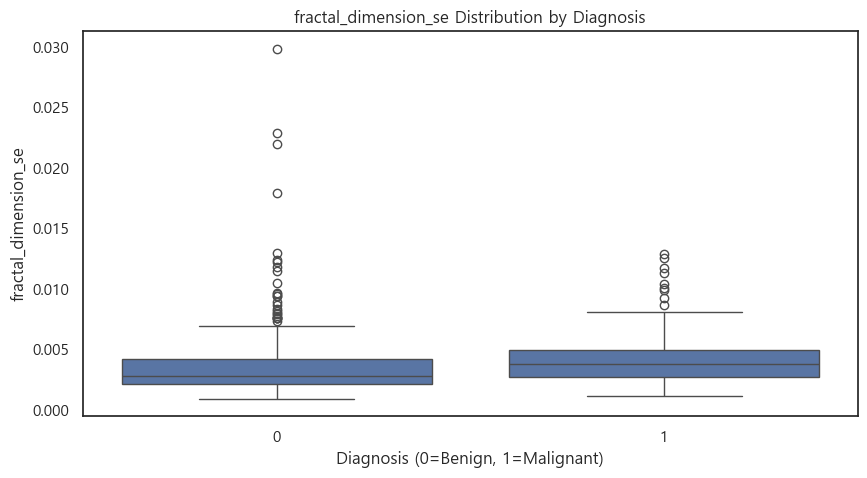

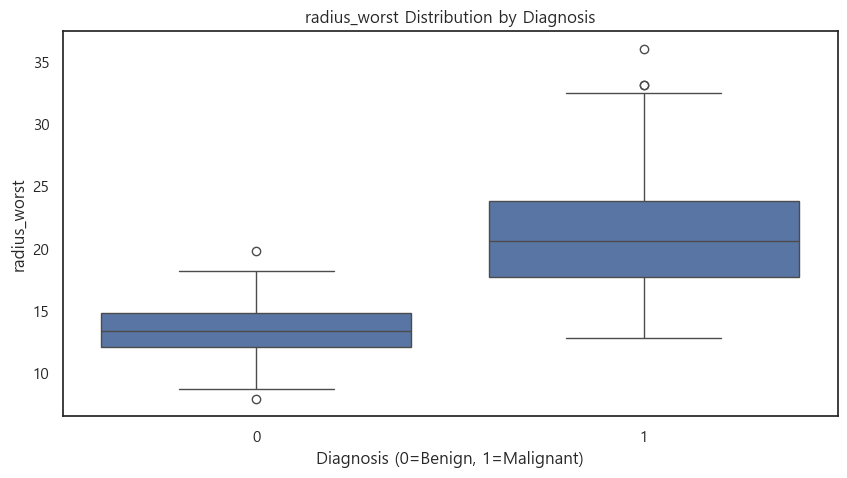

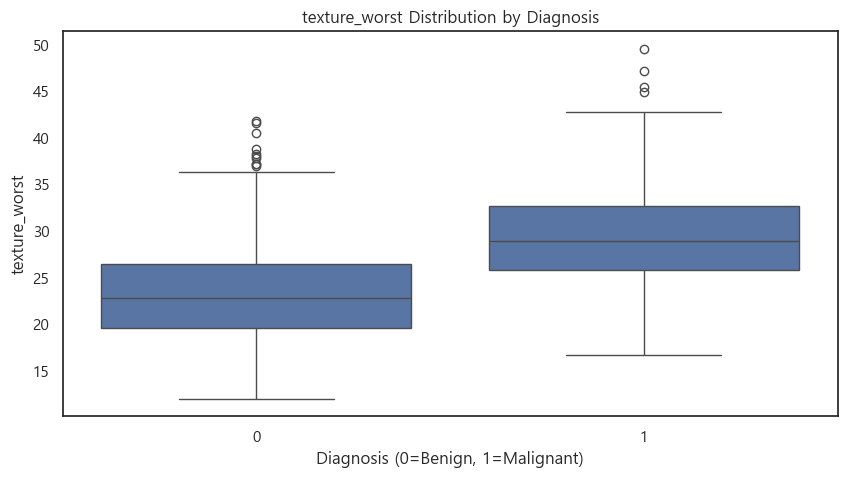

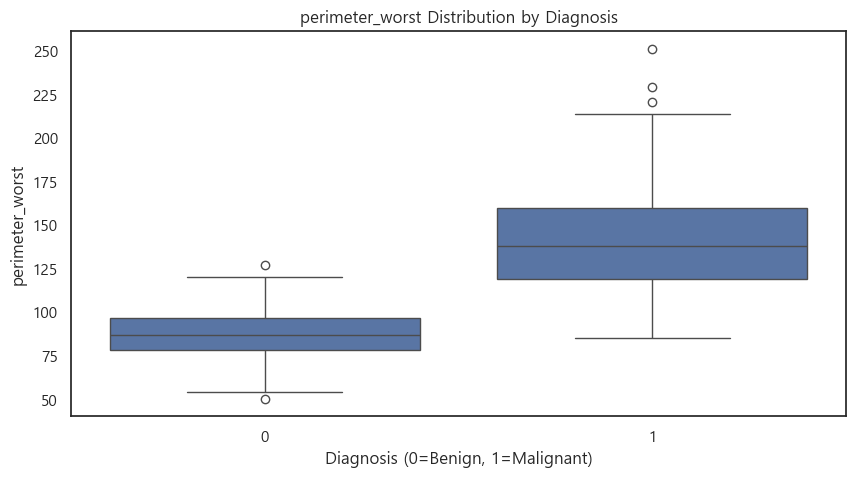

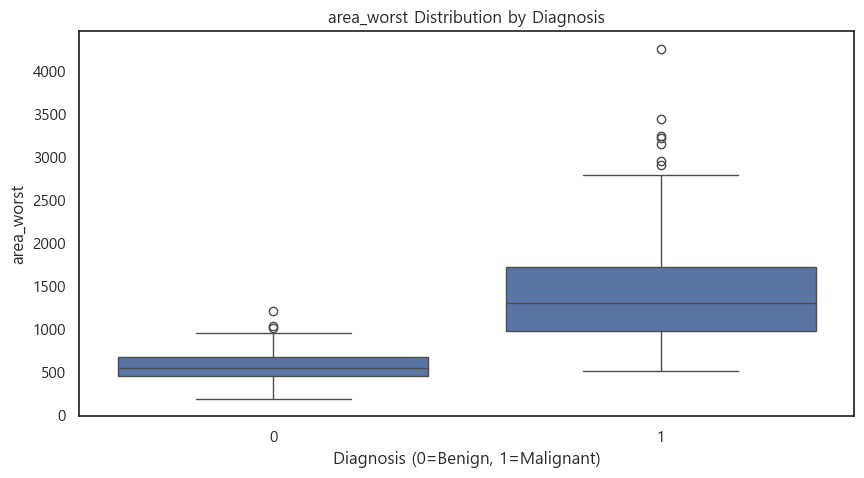

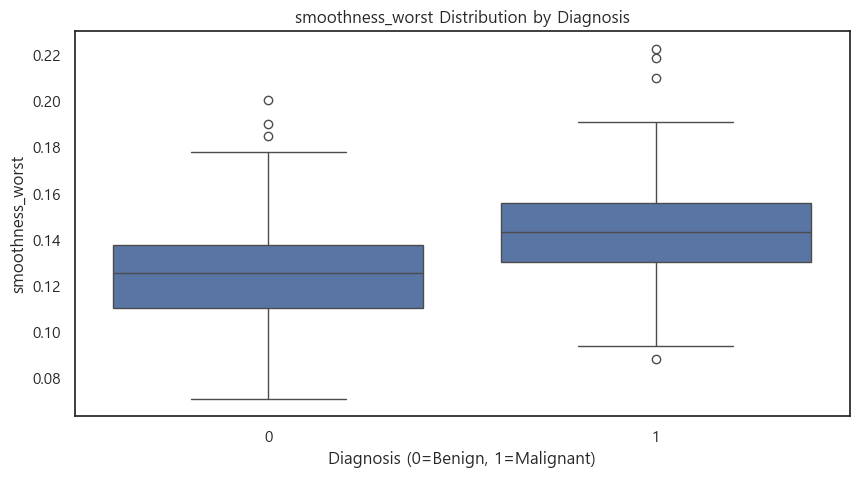

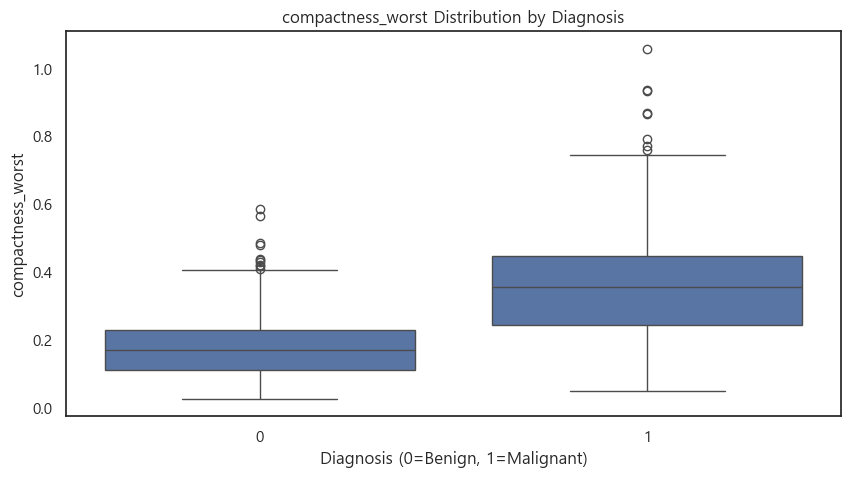

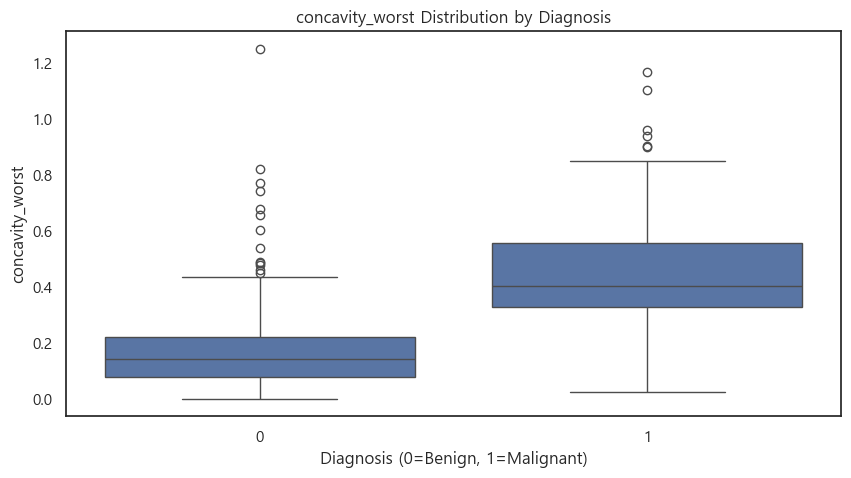

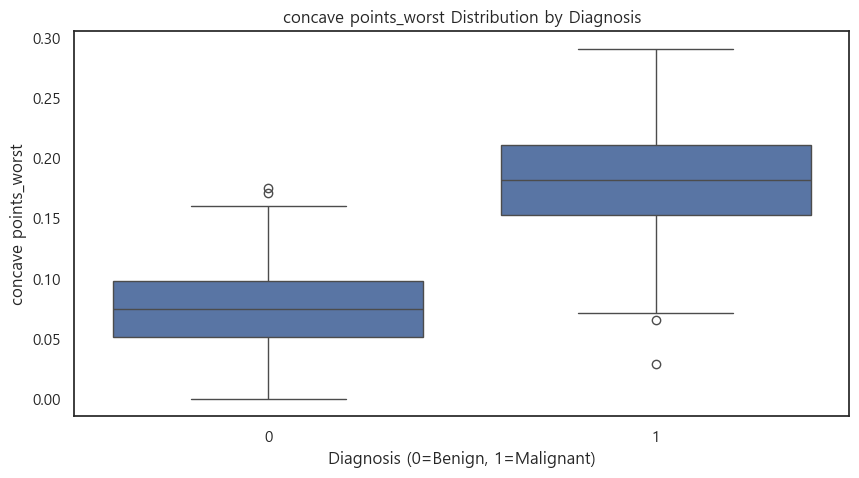

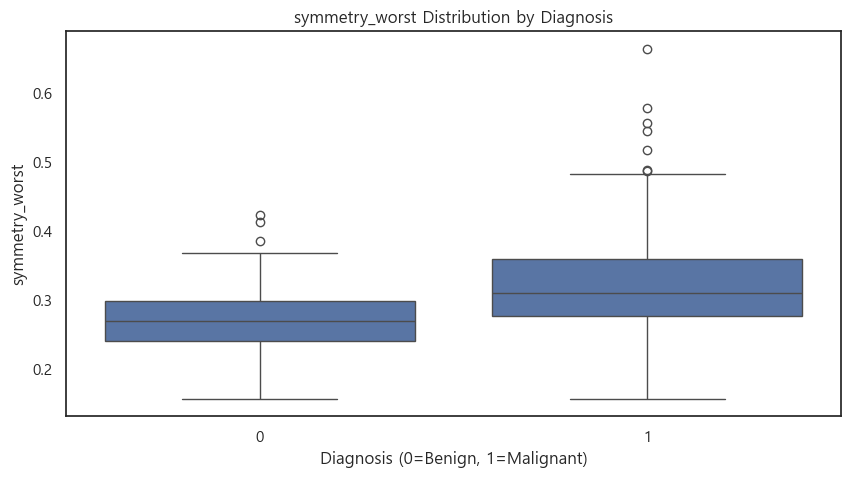

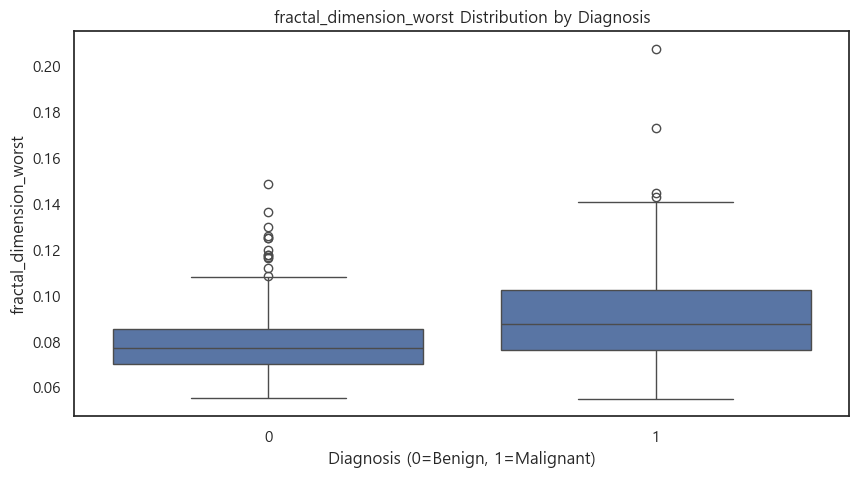

In [46]:
def distributions_by_diagnosis(df, column_name):
    """
    특정 컬럼(column_name)의 값 분포를 diagnosis(진단값: 0=Benign, 1=Malignant) 기준으로 시각화
    """
    sns.boxplot(x=df['diagnosis'], y=df[column_name])
    plt.title(f'{column_name} Distribution by Diagnosis')
    plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
    plt.ylabel(f'{column_name}')
    plt.show()

# diagnosis 컬럼을 제외한 모든 컬럼에 대해 박스플롯 그리기
boxplot_cols = [x for x in df.columns if x != 'diagnosis']

for col in boxplot_cols:
    distributions_by_diagnosis(df, col)


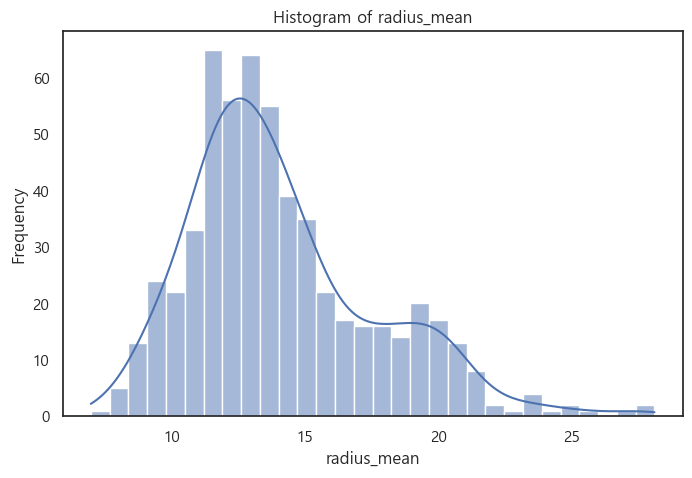

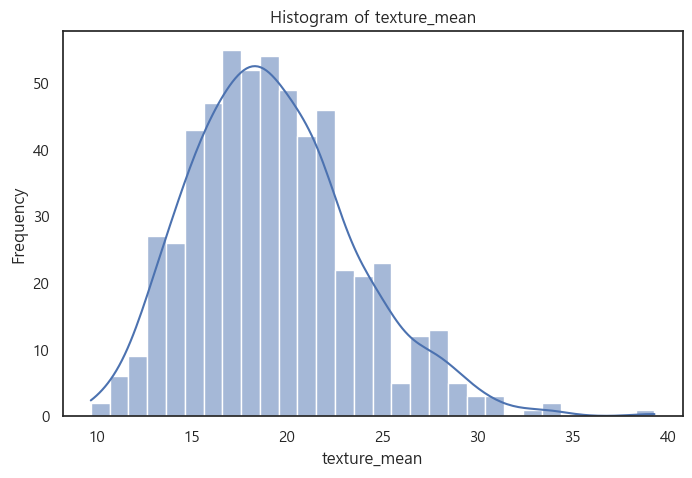

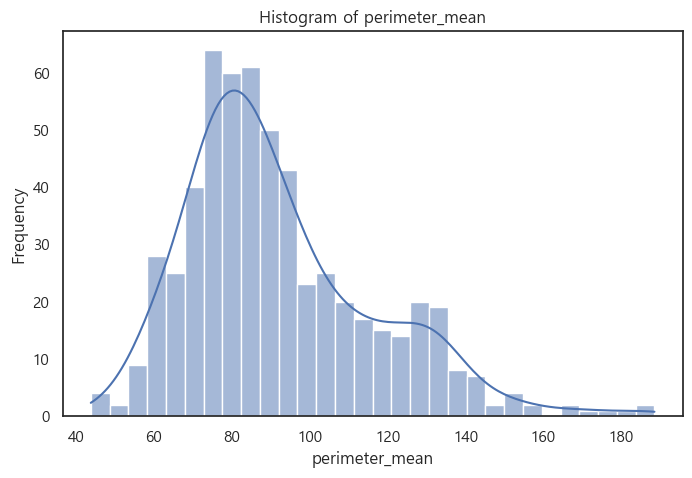

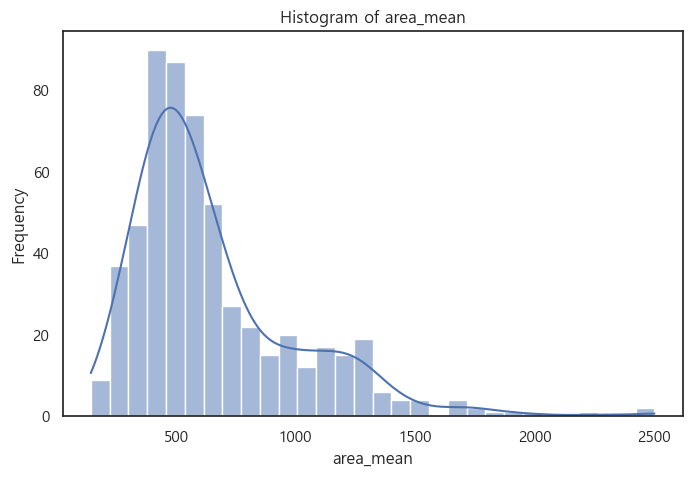

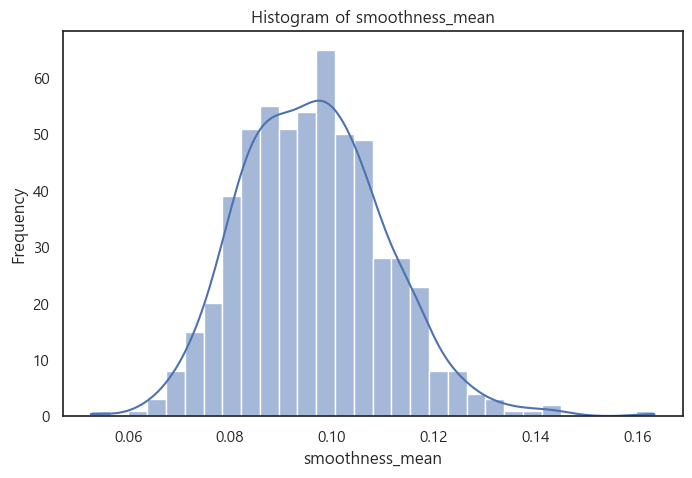

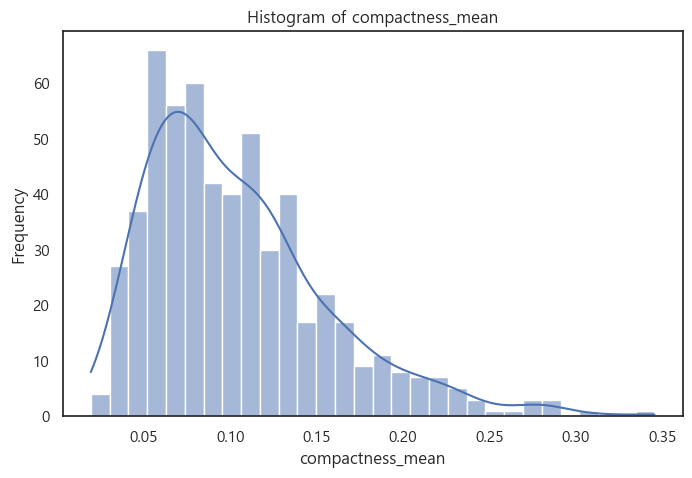

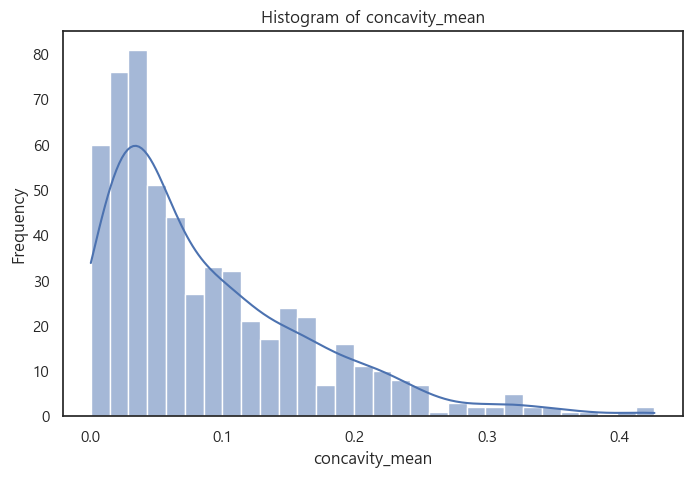

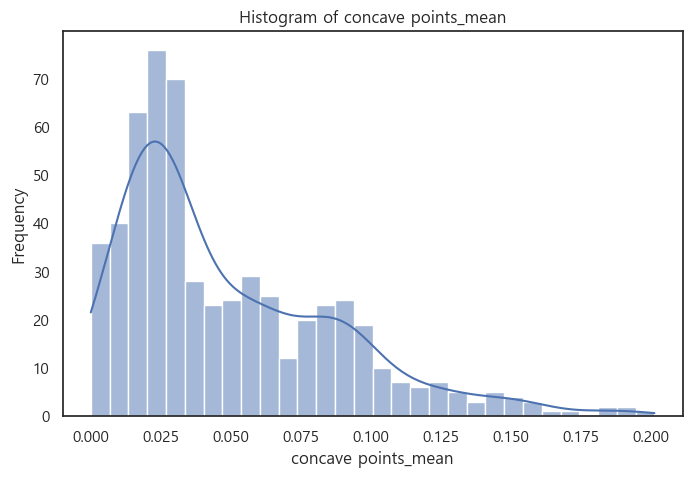

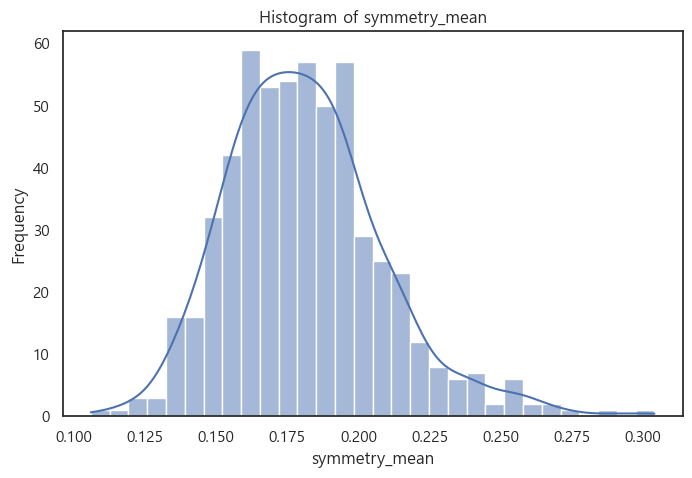

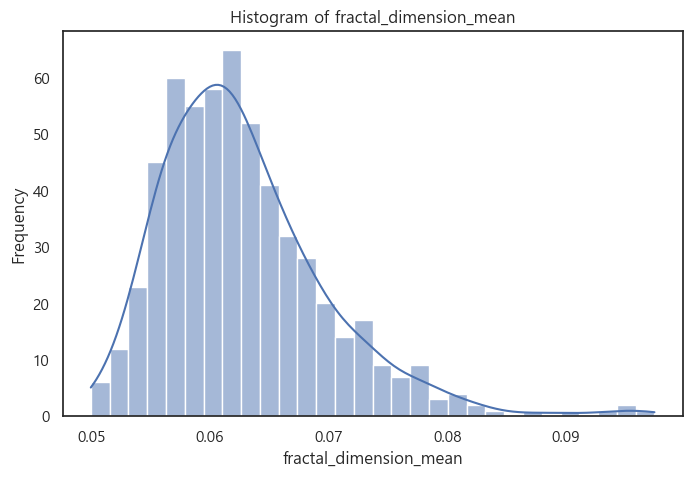

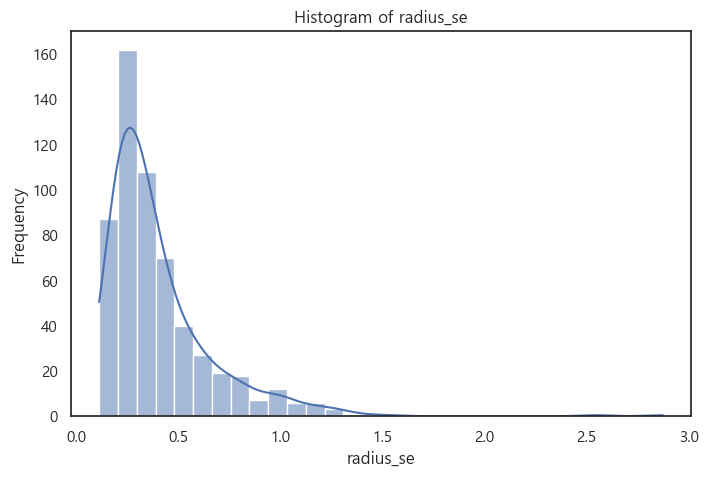

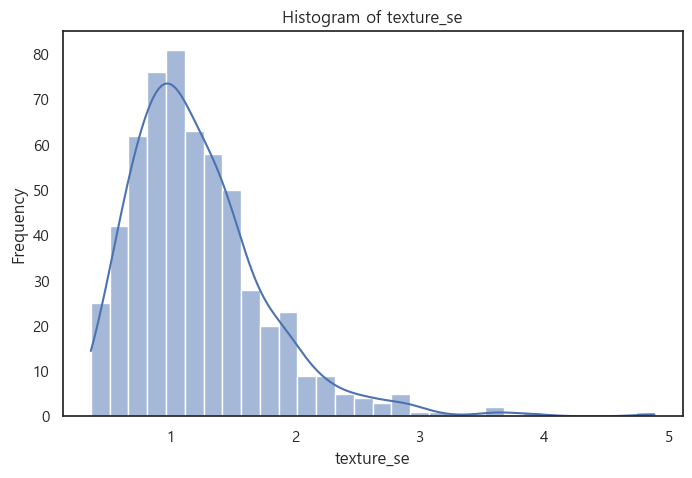

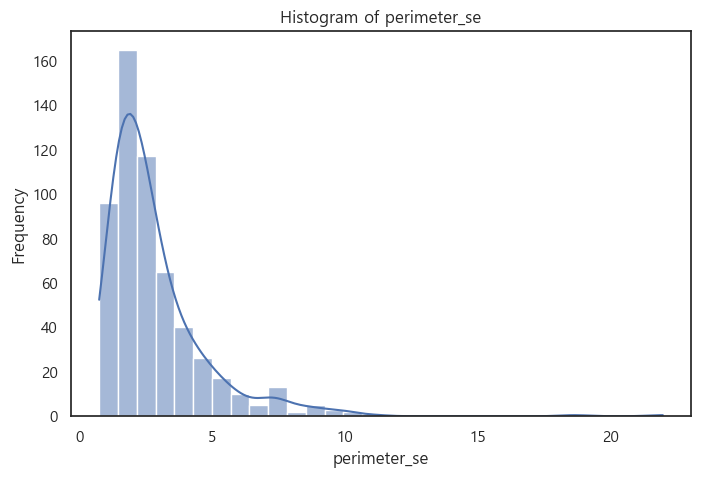

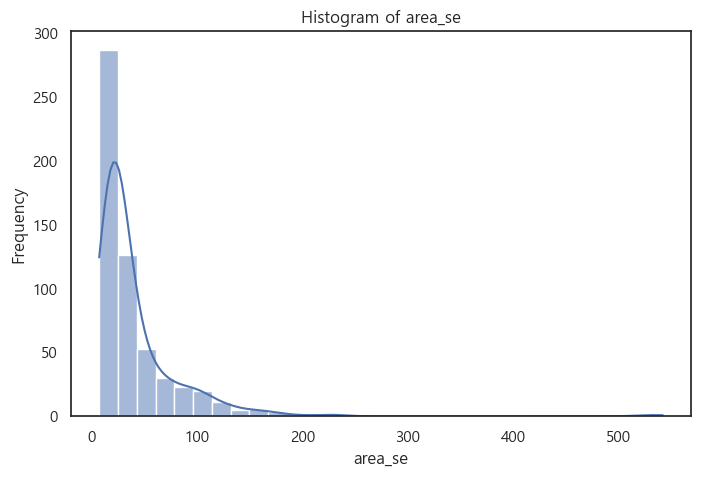

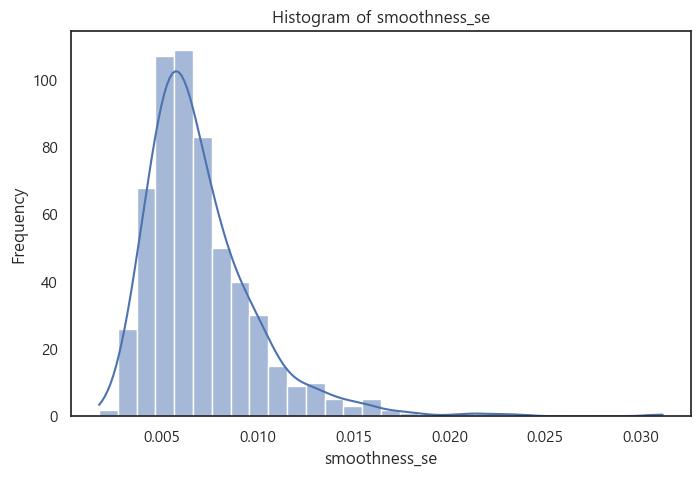

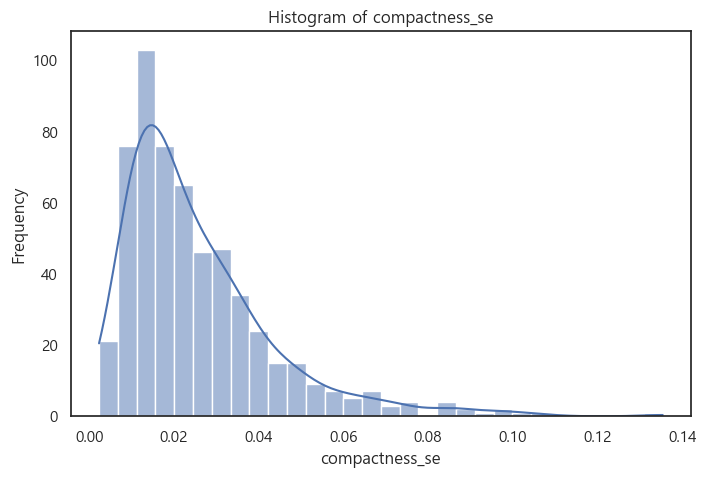

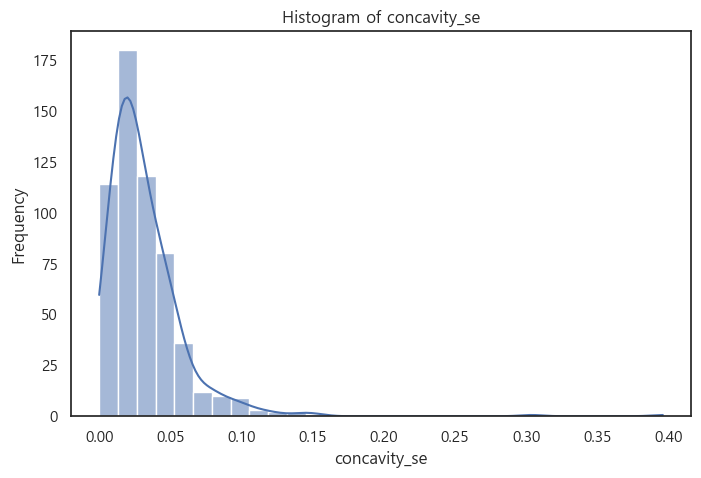

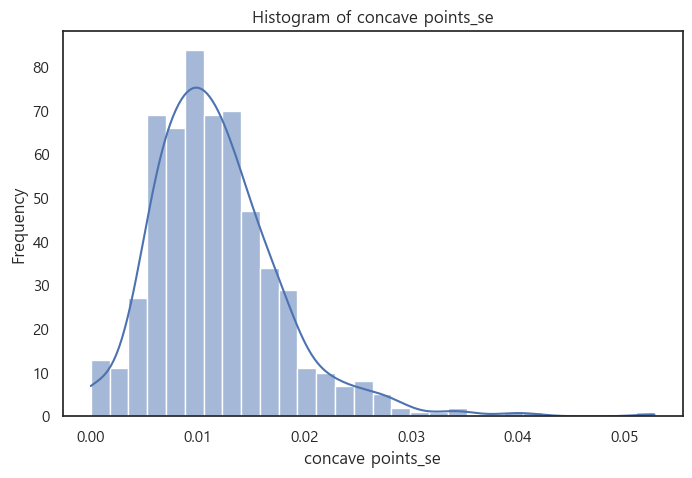

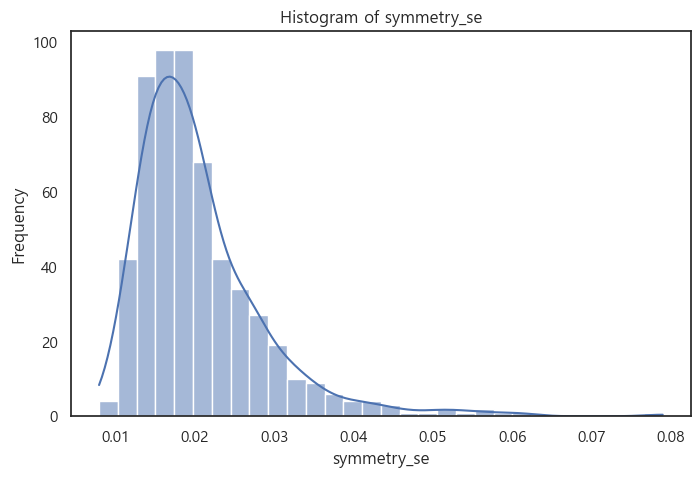

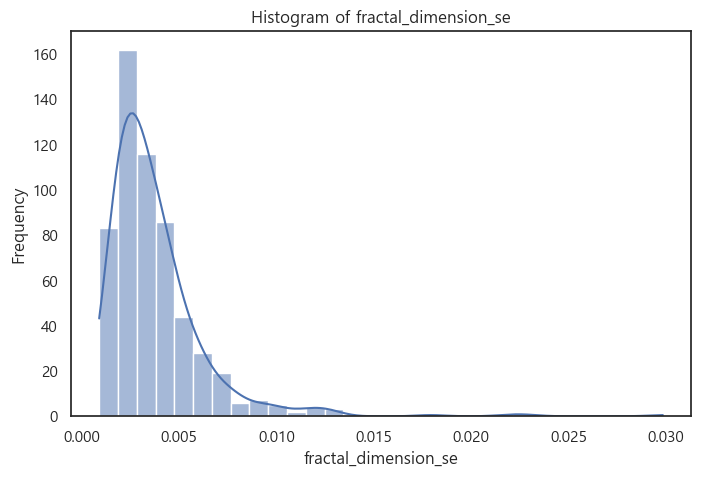

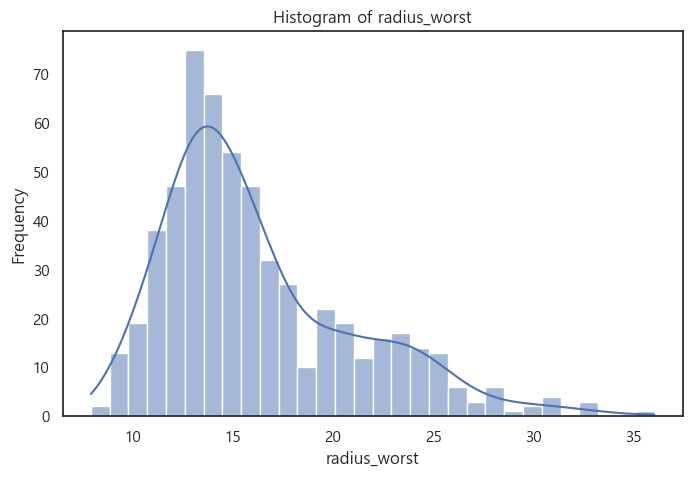

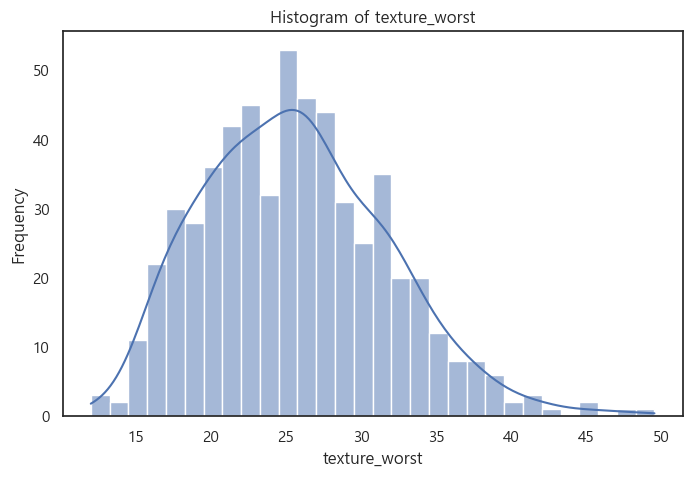

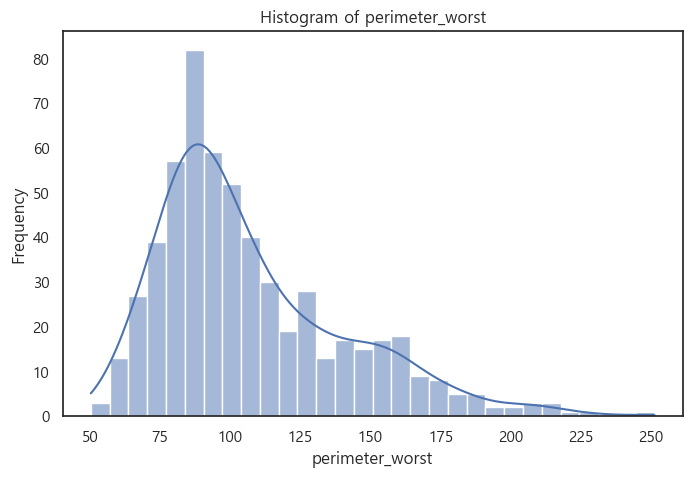

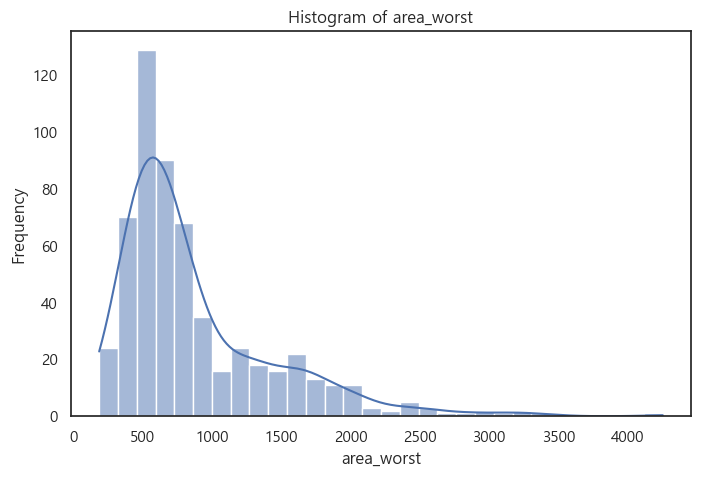

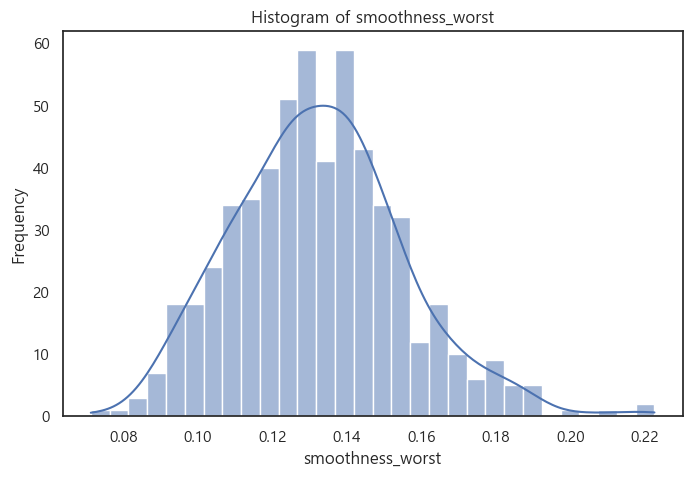

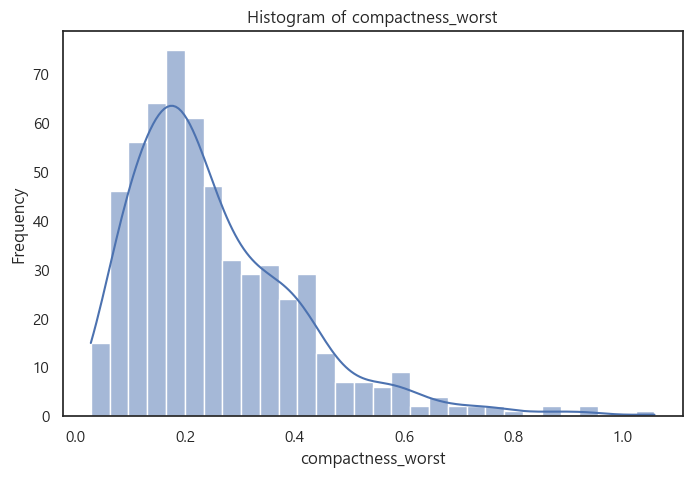

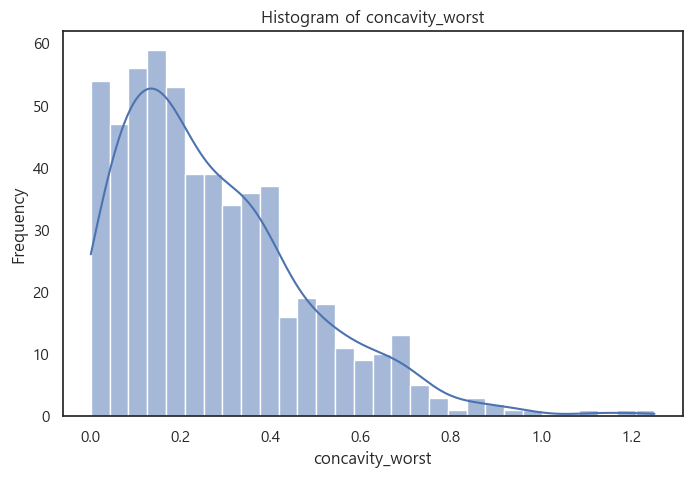

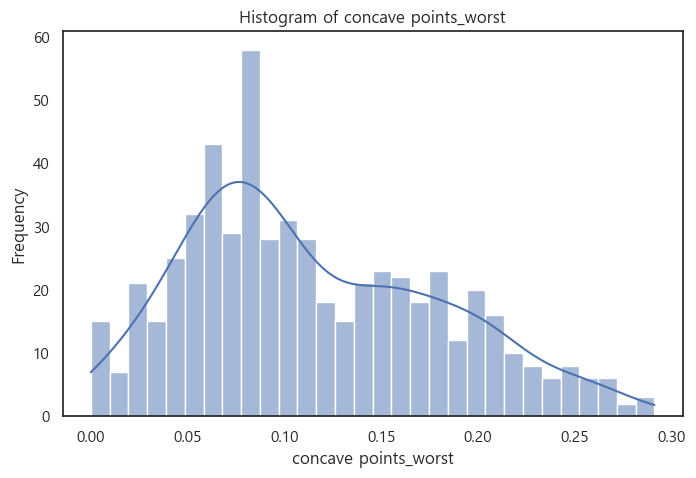

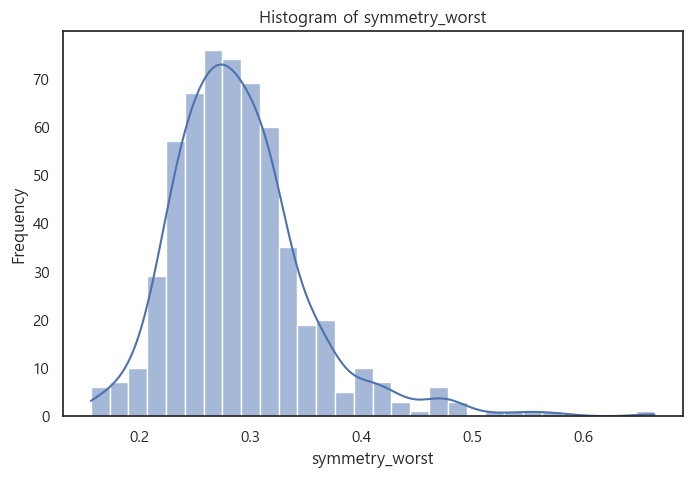

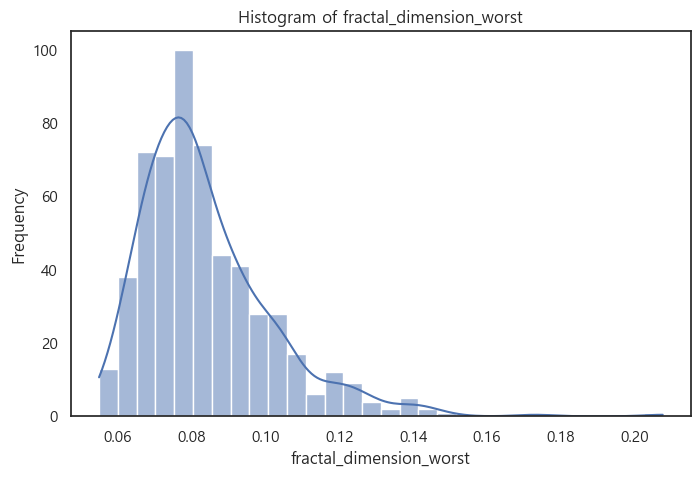

In [47]:
# diagnosis 컬럼을 제외한 모든 컬럼을 대상으로 히스토그램 그리기
hist_cols = [x for x in df.columns if x != 'diagnosis']

for col in hist_cols:
    plt.figure(figsize=(8, 5))
    
    # 히스토그램 및 커널 밀도 추정(KDE) 그래프 생성
    sns.histplot(data=df[col], kde=True, bins=30)
    
    # 그래프 제목 및 라벨 설정
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    
    plt.show()


In [48]:
from scipy.stats import mannwhitneyu

# diagnosis 컬럼을 제외한 모든 컬럼을 대상으로 Mann-Whitney U 검정 수행
mannwhitneyu_cols = [x for x in df.columns if x != 'diagnosis']

for col in mannwhitneyu_cols:
    # Benign(0)과 Malignant(1) 그룹으로 데이터 분리
    benign = df[df['diagnosis'] == 0][col]
    malignant = df[df['diagnosis'] == 1][col]
    
    # Mann-Whitney U 검정 수행 (두 그룹 간 분포 차이 검정)
    u_stat, p_value = mannwhitneyu(benign, malignant, alternative='two-sided')
    
    # 결과 출력
    print(f"{col}: U-statistic={u_stat:.3f}, p-value={p_value:.5f}")


radius_mean: U-statistic=4729.000, p-value=0.00000
texture_mean: U-statistic=16966.500, p-value=0.00000
perimeter_mean: U-statistic=4019.000, p-value=0.00000
area_mean: U-statistic=4668.500, p-value=0.00000
smoothness_mean: U-statistic=21037.000, p-value=0.00000
compactness_mean: U-statistic=10309.500, p-value=0.00000
concavity_mean: U-statistic=4705.500, p-value=0.00000
concave points_mean: U-statistic=2691.500, p-value=0.00000
symmetry_mean: U-statistic=22814.000, p-value=0.00000
fractal_dimension_mean: U-statistic=39012.500, p-value=0.53719
radius_se: U-statistic=9965.000, p-value=0.00000
texture_se: U-statistic=36964.500, p-value=0.64369
perimeter_se: U-statistic=9355.000, p-value=0.00000
area_se: U-statistic=5569.500, p-value=0.00000
smoothness_se: U-statistic=40200.500, p-value=0.21363
compactness_se: U-statistic=20640.500, p-value=0.00000
concavity_se: U-statistic=16588.500, p-value=0.00000
concave points_se: U-statistic=15758.000, p-value=0.00000
symmetry_se: U-statistic=42013.

# Mann-Whitney U 검정 결과 요약

## 1. 진단값과 **강한 차이**를 보이는 변수들 (p < 0.05, U-statistic 작음)
- 암 진단에 **매우 중요한 변수**일 가능성이 높음.
- `radius_worst`
- `perimeter_worst`
- `area_worst`
- `concave points_worst`
- `concave points_mean`
- `radius_mean`
- `concavity_mean`

## 2. 진단값과 **중간 정도 차이**를 보이는 변수들 (p < 0.05)
- 영향은 있지만 상대적으로 덜 중요할 가능성이 있음.
- `smoothness_mean`
- `compactness_mean`
- `symmetry_worst`
- `fractal_dimension_worst`
- `concavity_se`
- `compactness_se`

## 3. 진단값과 **차이가 없는 변수들** (p ≥ 0.05)
- 암 진단과 관련성이 낮을 가능성이 있음.
- `fractal_dimension_mean` (p=0.53719)
- `texture_se` (p=0.64369)
- `smoothness_se` (p=0.21363)
- `symmetry_se` (p=0.02784) → 약간의 차이 존재

In [49]:
def replace_outliers_with_median(df, replace_cols):
    """
    지정된 컬럼(replace_cols)의 이상치를 중앙값(median)으로 대체
    이상치 기준: IQR(사분위 범위)을 이용하여 1.5*IQR 밖의 값
    """
    for col in replace_cols:
        # 1사분위(Q1), 3사분위(Q3) 및 IQR 계산
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - 1.5 * IQR
        Upper_bound = Q3 + 1.5 * IQR

        # 이상치 판별 (IQR 범위를 벗어난 값)
        mask = (df[col] < Lower_bound) | (df[col] > Upper_bound)
        
        # 이상치를 중앙값으로 대체
        df.loc[mask, col] = df[col].median()
        
    return df

# 이상치를 중앙값으로 대체할 컬럼 지정
replace_cols = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

# 이상치 대체 적용
df = replace_outliers_with_median(df, replace_cols)

# 데이터 확인
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5. 데이터 변환 및 스케일링

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 입력 데이터(X)와 타겟 변수(y) 분리
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# StandardScaler 적용 (Logistic Regression & SVM용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할 (트리 기반 모델은 원본 데이터 사용, Logistic Regression & SVM은 스케일링된 데이터 사용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# NumPy 배열 변환 (모델 호환성 확보)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### 모델 학습 및 평가 (Model Training & Evaluation)

모델 성능을 최적화하기 위해 **트리 기반 모델과 선형 모델(SVM, Logistic Regression)을 학습**하고,  
**10-Fold 교차 검증을 사용하여 모델의 정확도를 평가**합니다.

### 1. 모델 정의 및 10-Fold 교차 검증 설정

In [51]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC   
from sklearn.linear_model import LogisticRegression

# 모델 정의
rf_model = RandomForestClassifier()
et_model = ExtraTreesClassifier()
gb_model = GradientBoostingClassifier()
svc_model = SVC()
lr_model = LogisticRegression()

# 10-Fold 교차 검증 설정
kfold = KFold(n_splits=10, shuffle=True, random_state=42)


### 2. 모델 학습 및 10-Fold 교차 검증 성능 평가

In [52]:
# 트리 기반 모델 평가 (스케일링 없이 원본 데이터 사용)
def tree_model_test(model):
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    return np.mean(score) * 100

# 스케일링이 필요한 모델 평가 (로지스틱 회귀, SVM)
def model_test(model):
    model.fit(X_train_scaled, y_train)
    score = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    return np.mean(score) * 100

# 트리 기반 모델 성능 평가
tree_models = [rf_model, et_model, gb_model]
for model in tree_models:
    result = tree_model_test(model)
    print(f'{type(model).__name__} Performance: {result:.2f}%')

# 로지스틱 회귀 및 SVM 성능 평가
models = [svc_model, lr_model]
for model in models:
    result = model_test(model)
    print(f'{type(model).__name__} Performance: {result:.2f}%')


RandomForestClassifier Performance: 95.81%
ExtraTreesClassifier Performance: 96.03%
GradientBoostingClassifier Performance: 95.60%
SVC Performance: 97.36%
LogisticRegression Performance: 97.15%


### 3. 트리 기반 모델의 Feature Importance 확인

In [53]:
# 트리 기반 모델의 Feature Importance 출력
for model in tree_models:
    print(f'\n{type(model).__name__}:')
    try:
        # 모델의 Feature Importance 가져오기
        importances = model.feature_importances_
        print(f'Feature Importances: {importances}')

        # 가장 중요한 특징 찾기
        max_importance = np.max(importances)
        max_feature_idx = np.argmax(importances)
        print(f'Max Importance: {max_importance:.4f} (Feature Index: {max_feature_idx})')

    except AttributeError as e:
        print("Feature importances not available.")
        print(f'Error: {e}')


RandomForestClassifier:
Feature Importances: [0.03990943 0.01406262 0.05990477 0.03407926 0.00460332 0.01580111
 0.04934032 0.14799436 0.00455102 0.00509906 0.00544323 0.00562828
 0.01171551 0.01845572 0.00323043 0.00514137 0.01112044 0.00343199
 0.00712739 0.00382007 0.07215063 0.02046732 0.12598942 0.1272808
 0.01149651 0.01798831 0.04057928 0.11008392 0.01624547 0.00725865]
Max Importance: 0.1480 (Feature Index: 7)

ExtraTreesClassifier:
Feature Importances: [0.05207241 0.02031766 0.06637249 0.06303467 0.00939787 0.02955463
 0.05148605 0.0702047  0.00775302 0.00589105 0.02291919 0.00718209
 0.01360882 0.01886361 0.00608501 0.00752054 0.00907159 0.01139116
 0.00742854 0.00629203 0.07126567 0.0341013  0.09209445 0.07393669
 0.0151312  0.02569622 0.0634816  0.10543367 0.01800951 0.01440255]
Max Importance: 0.1054 (Feature Index: 27)

GradientBoostingClassifier:
Feature Importances: [8.62962175e-04 3.20875921e-02 1.87227240e-04 9.22722096e-05
 3.62730687e-03 2.02165644e-03 2.21600153e-

### 4. Feature Importance 데이터프레임 생성 및 평균 중요도 계산

In [54]:
import pandas as pd

# 각 모델의 Feature Importance 데이터프레임 생성
rf_model_importance = pd.DataFrame({'Feature': X_train.columns, 'rf_model': rf_model.feature_importances_})
et_model_importance = pd.DataFrame({'Feature': X_train.columns, 'et_model': et_model.feature_importances_})
gb_model_importance = pd.DataFrame({'Feature': X_train.columns, 'gb_model': gb_model.feature_importances_})

# Feature Importance 데이터프레임 병합
importances = pd.merge(rf_model_importance, et_model_importance, on='Feature')
importances = pd.merge(importances, gb_model_importance, on='Feature')

# 평균 Feature Importance 계산
numeric_columns = [col for col in importances.columns if col != 'Feature']
importances['avg'] = importances[numeric_columns].mean(axis=1)

# 평균 중요도 기준으로 정렬
importances = importances[['Feature', 'avg']].sort_values(by='avg', ascending=False)

# 최종 Feature Importance 출력
importances

,Feature,avg
7,concave points_mean,0.222335
27,concave points_worst,0.152190
22,perimeter_worst,0.089491
23,area_worst,0.079904
20,radius_worst,0.073068
2,perimeter_mean,0.042155
26,concavity_worst,0.040629
6,concavity_mean,0.034347
3,area_mean,0.032402
0,radius_mean,0.030948


### 5. Feature Importance 0.005 이상인 Feature만 선택

In [55]:
# Feature 중요도 0.005 이상인 Feature만 선택(95% 이상)
selected_features = importances[importances['avg'] >= 0.005]['Feature'].tolist()

# 선택된 Feature만 포함한 새로운 학습 및 테스트 데이터 생성
X_train_importance = X_train[selected_features]
X_test_importance = X_test[selected_features]

### 6. Feature Selection 후 모델 성능 평가

In [56]:
# 트리 기반 모델 성능 평가 함수
def tree_model_test(model):
    """
    선택된 중요한 Feature만 포함된 데이터(X_train_importance)로 모델을 학습하고
    10-Fold 교차 검증을 통해 정확도를 평가하여 평균 정확도를 반환.
    """
    model.fit(X_train_importance, y_train)
    score = cross_val_score(model, X_train_importance, y_train, cv=kfold, scoring='accuracy')
    return np.mean(score) * 100

# 트리 기반 모델 리스트 (Random Forest, Extra Trees, Gradient Boosting)
tree_models = [rf_model, et_model, gb_model]

# 각 모델의 성능 평가 및 출력
for model in tree_models:
    result = tree_model_test(model)
    print(f'{type(model).__name__} Performance: {result:.2f}%')

RandomForestClassifier Performance: 94.49%
ExtraTreesClassifier Performance: 96.91%
GradientBoostingClassifier Performance: 95.83%


### 하이퍼파라미터 튜닝 (Hyperparameter Tuning)

모델의 성능을 최적화하기 위해 **하이퍼파라미터 튜닝**을 수행합니다.  
주요 방법으로 **RandomizedSearchCV**와 **GridSearchCV**를 활용하여 최적의 하이퍼파라미터 조합을 찾습니다.

- **🔹 RandomizedSearchCV:**  
  - 넓은 하이퍼파라미터 범위에서 무작위로 샘플링하여 최적의 조합을 탐색  
  - 탐색 속도가 빠르고, 대략적인 최적 값을 찾는 데 유용  

- **🔹 GridSearchCV:**  
  - RandomizedSearchCV에서 찾은 최적값을 중심으로 **세밀한 탐색**을 진행  
  - 모든 조합을 평가하여 가장 성능이 좋은 하이퍼파라미터를 선정  

튜닝 대상 모델:  
**트리 기반 모델:** RandomForest, ExtraTrees, Gradient Boosting  
**선형 모델:** Support Vector Classifier (SVC), Logistic Regression  

이 과정을 통해 **각 모델의 최적 하이퍼파라미터를 찾고, 성능을 비교하여 최종 모델을 선택합니다.**


In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from scipy import stats

# Stratified K-Fold 교차 검증 설정 (클래스 비율 유지)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [58]:
# 랜덤 포레스트 모델 정의
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV를 위한 하이퍼파라미터 분포 설정
rf_param_distributions = {
    'n_estimators': randint(100, 1000),  # 트리 개수: 100~1000 사이에서 랜덤 탐색
    'max_depth': [None, 10, 20, 30, 50],  # 최대 깊이: 특정 값 또는 제한 없음
    'min_samples_split': randint(2, 20),  # 내부 노드를 분할하는 최소 샘플 수
    'min_samples_leaf': randint(1, 10),  # 리프 노드에 있어야 할 최소 샘플 수
    'max_features': ['sqrt', 'log2', None]  # 최대 사용할 Feature 수
}

# RandomizedSearchCV 실행 (랜덤 탐색)
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,  
    param_distributions=rf_param_distributions,  
    n_iter=50,  # 50번 랜덤 샘플링
    cv=cv,  # 5-Fold Stratified K-Fold 사용
    scoring='accuracy',  
    random_state=42,  
    verbose=2,  
    n_jobs=-1  # 병렬 처리 사용
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
rf_random_search.fit(X_train_importance, y_train)

# RandomizedSearchCV 결과 출력
print("Best parameters (RandomizedSearchCV):", rf_random_search.best_params_)
print("Best accuracy (RandomizedSearchCV):", rf_random_search.best_score_)

# GridSearchCV를 위한 파라미터 범위 설정 (RandomizedSearchCV 결과 기반 세부 조정)
rf_param_grid = {
    'n_estimators': [
        max(100, rf_random_search.best_params_['n_estimators'] - 100), 
        rf_random_search.best_params_['n_estimators'], 
        rf_random_search.best_params_['n_estimators'] + 100
    ],
    'max_depth': [
        max(1, rf_random_search.best_params_['max_depth'] - 10), 
        rf_random_search.best_params_['max_depth'], 
        rf_random_search.best_params_['max_depth'] + 10
    ] if rf_random_search.best_params_['max_depth'] else [None],
    'min_samples_split': [
        max(2, rf_random_search.best_params_['min_samples_split'] - 2), 
        rf_random_search.best_params_['min_samples_split'], 
        rf_random_search.best_params_['min_samples_split'] + 2
    ],
    'min_samples_leaf': [
        max(1, rf_random_search.best_params_['min_samples_leaf'] - 2), 
        rf_random_search.best_params_['min_samples_leaf'], 
        rf_random_search.best_params_['min_samples_leaf'] + 2
    ],
    'max_features': [rf_random_search.best_params_['max_features']]
}

# GridSearchCV 실행 (세부 탐색)
rf_grid_search = GridSearchCV(
    estimator=rf_model,  
    param_grid=rf_param_grid,  
    cv=cv,
    scoring='accuracy',  
    verbose=2,  
    n_jobs=-1  
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
rf_grid_search.fit(X_train_importance, y_train)

# GridSearchCV 결과 출력
print("Best parameters (GridSearchCV):", rf_grid_search.best_params_)
print("Best accuracy (GridSearchCV):", rf_grid_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters (RandomizedSearchCV): {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 741}
Best accuracy (RandomizedSearchCV): 0.9560439560439562
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters (GridSearchCV): {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 741}
Best accuracy (GridSearchCV): 0.9560439560439562


In [59]:
# ExtraTreesClassifier 모델 정의
et_model = ExtraTreesClassifier(random_state=42)

# RandomizedSearchCV를 위한 하이퍼파라미터 분포 설정
et_param_distributions = {
    'n_estimators': randint(100, 1000),  # 트리 개수: 100~1000 사이 랜덤 탐색
    'max_depth': [None, 10, 20, 30, 50],  # 최대 깊이
    'min_samples_split': randint(2, 20),  # 최소 분할 샘플 수
    'min_samples_leaf': randint(1, 10),  # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 'log2', None]  # 사용할 Feature 수
}

# RandomizedSearchCV 실행 (랜덤 탐색)
et_random_search = RandomizedSearchCV(
    estimator=et_model,  
    param_distributions=et_param_distributions,  
    n_iter=50,  # 50개의 랜덤 조합 샘플링
    cv=cv,  # 5-Fold Stratified K-Fold 사용
    scoring='accuracy',  
    random_state=42,  
    verbose=2,  
    n_jobs=-1  # 병렬 처리
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
et_random_search.fit(X_train_importance, y_train)

# RandomizedSearchCV 결과 출력
print("Best parameters (RandomizedSearchCV):", et_random_search.best_params_)
print("Best accuracy (RandomizedSearchCV):", et_random_search.best_score_)

# GridSearchCV를 위한 파라미터 범위 설정 (RandomizedSearchCV 결과 기반)
et_param_grid = {
    'n_estimators': [
        max(100, et_random_search.best_params_['n_estimators'] - 100), 
        et_random_search.best_params_['n_estimators'], 
        et_random_search.best_params_['n_estimators'] + 100
    ],
    'max_depth': [
        max(1, et_random_search.best_params_['max_depth'] - 10), 
        et_random_search.best_params_['max_depth'], 
        et_random_search.best_params_['max_depth'] + 10
    ] if et_random_search.best_params_['max_depth'] else [None],
    'min_samples_split': [
        max(2, et_random_search.best_params_['min_samples_split'] - 2), 
        et_random_search.best_params_['min_samples_split'], 
        et_random_search.best_params_['min_samples_split'] + 2
    ],
    'min_samples_leaf': [
        max(1, et_random_search.best_params_['min_samples_leaf'] - 2), 
        et_random_search.best_params_['min_samples_leaf'], 
        et_random_search.best_params_['min_samples_leaf'] + 2
    ],
    'max_features': [et_random_search.best_params_['max_features']]
}

# GridSearchCV 실행 (세부 탐색)
et_grid_search = GridSearchCV(
    estimator=et_model,  
    param_grid=et_param_grid,  
    cv=cv,
    scoring='accuracy',  
    verbose=2,  
    n_jobs=-1  
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
et_grid_search.fit(X_train_importance, y_train)

# GridSearchCV 결과 출력
print("Best parameters (GridSearchCV):", et_grid_search.best_params_)
print("Best accuracy (GridSearchCV):", et_grid_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters (RandomizedSearchCV): {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 741}
Best accuracy (RandomizedSearchCV): 0.9582417582417582
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters (GridSearchCV): {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 841}
Best accuracy (GridSearchCV): 0.9626373626373625


In [60]:
# Gradient Boosting 모델 정의
gb_model = GradientBoostingClassifier(random_state=42)

# RandomizedSearchCV를 위한 하이퍼파라미터 분포 설정
gb_param_distributions = {
    'n_estimators': randint(100, 1000),  # 트리 개수: 100~1000 사이 랜덤 탐색
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 5, 7, 10],  # 최대 깊이
    'subsample': [0.6, 0.8, 1.0],  # 샘플링 비율
    'min_samples_split': randint(2, 20),  # 최소 분할 샘플 수
    'min_samples_leaf': randint(1, 10)  # 리프 노드 최소 샘플 수
}

# RandomizedSearchCV 실행 (랜덤 탐색)
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,  
    param_distributions=gb_param_distributions,  
    n_iter=50,  # 50개의 랜덤 조합 샘플링
    cv=cv,  # 5-Fold Stratified K-Fold 사용
    scoring='accuracy',  
    random_state=42,  
    verbose=2,  
    n_jobs=-1  # 병렬 처리
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
gb_random_search.fit(X_train_importance, y_train)

# RandomizedSearchCV 결과 출력
print("Best parameters (RandomizedSearchCV):", gb_random_search.best_params_)
print("Best accuracy (RandomizedSearchCV):", gb_random_search.best_score_)

# GridSearchCV를 위한 파라미터 범위 설정 (RandomizedSearchCV 결과 기반)
gb_param_grid = {
    'n_estimators': [
        max(100, gb_random_search.best_params_['n_estimators'] - 100), 
        gb_random_search.best_params_['n_estimators'], 
        gb_random_search.best_params_['n_estimators'] + 100
    ],
    'learning_rate': [
        max(0.01, gb_random_search.best_params_['learning_rate'] / 2),
        gb_random_search.best_params_['learning_rate'],
        min(0.2, gb_random_search.best_params_['learning_rate'] * 2)
    ],
    'max_depth': [
        max(1, gb_random_search.best_params_['max_depth'] - 2), 
        gb_random_search.best_params_['max_depth'], 
        gb_random_search.best_params_['max_depth'] + 2
    ],
    'subsample': [
        max(0.6, gb_random_search.best_params_['subsample'] - 0.1),
        gb_random_search.best_params_['subsample'],
        min(1.0, gb_random_search.best_params_['subsample'] + 0.1)
    ],
    'min_samples_split': [
        max(2, gb_random_search.best_params_['min_samples_split'] - 2), 
        gb_random_search.best_params_['min_samples_split'], 
        gb_random_search.best_params_['min_samples_split'] + 2
    ],
    'min_samples_leaf': [
        max(1, gb_random_search.best_params_['min_samples_leaf'] - 2), 
        gb_random_search.best_params_['min_samples_leaf'], 
        gb_random_search.best_params_['min_samples_leaf'] + 2
    ]
}

# GridSearchCV 실행 (세부 탐색)
gb_grid_search = GridSearchCV(
    estimator=gb_model,  
    param_grid=gb_param_grid,  
    cv=cv,
    scoring='accuracy',  
    verbose=2,  
    n_jobs=-1  
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
gb_grid_search.fit(X_train_importance, y_train)

# GridSearchCV 결과 출력
print("Best parameters (GridSearchCV):", gb_grid_search.best_params_)
print("Best accuracy (GridSearchCV):", gb_grid_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters (RandomizedSearchCV): {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 340, 'subsample': 0.6}
Best accuracy (RandomizedSearchCV): 0.9692307692307693
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters (GridSearchCV): {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 240, 'subsample': 0.7}
Best accuracy (GridSearchCV): 0.9758241758241759


In [61]:
# SVC 모델 정의
svc_model = SVC(random_state=42)

# RandomizedSearchCV를 위한 하이퍼파라미터 분포 설정
svc_param_distributions = {
    'C': stats.uniform(0.1, 100),  # C 값 (0.1 ~ 100 사이에서 연속적인 값 랜덤 탐색)
    'gamma': stats.uniform(0.0001, 1)  # 감마 값 (0.0001 ~ 1 사이에서 랜덤 탐색)
}

# RandomizedSearchCV 실행 (랜덤 탐색)
svc_random_search = RandomizedSearchCV(
    estimator=svc_model,  
    param_distributions=svc_param_distributions,  
    n_iter=50,  # 50개의 랜덤 조합 샘플링
    cv=cv,  # 5-Fold Stratified K-Fold 사용
    scoring='accuracy',  
    random_state=42,  
    verbose=2,  
    n_jobs=-1  # 병렬 처리
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
svc_random_search.fit(X_train_scaled, y_train)

# RandomizedSearchCV 결과 출력
print("Best parameters (RandomizedSearchCV):", svc_random_search.best_params_)
print("Best accuracy (RandomizedSearchCV):", svc_random_search.best_score_)

# GridSearchCV를 위한 파라미터 범위 설정 (RandomizedSearchCV 결과 기반)
svc_param_grid = {
    'C': [
        max(0.1, svc_random_search.best_params_['C'] / 2),
        svc_random_search.best_params_['C'],
        min(100, svc_random_search.best_params_['C'] * 2)
    ],
    'gamma': [
        max(0.0001, svc_random_search.best_params_['gamma'] / 2),
        svc_random_search.best_params_['gamma'],
        min(1, svc_random_search.best_params_['gamma'] * 2)
    ]
}

# GridSearchCV 실행 (세부 탐색)
svc_grid_search = GridSearchCV(
    estimator=svc_model,  
    param_grid=svc_param_grid,  
    cv=cv,
    scoring='accuracy',  
    verbose=2,  
    n_jobs=-1  
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
svc_grid_search.fit(X_train_scaled, y_train)

# GridSearchCV 결과 출력
print("Best parameters (GridSearchCV):", svc_grid_search.best_params_)
print("Best accuracy (GridSearchCV):", svc_grid_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters (RandomizedSearchCV): {'C': np.float64(77.22703466859457), 'gamma': np.float64(0.07414465173409036)}
Best accuracy (RandomizedSearchCV): 0.9692307692307691
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters (GridSearchCV): {'C': np.float64(38.613517334297285), 'gamma': np.float64(0.07414465173409036)}
Best accuracy (GridSearchCV): 0.9692307692307691


In [62]:
# Logistic Regression 모델 정의
lr_model = LogisticRegression(random_state=42, solver='saga', max_iter=5000)

# RandomizedSearchCV를 위한 하이퍼파라미터 분포 설정
lr_param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # 정규화 방식 (L1, L2, ElasticNet, None)
    'C': stats.uniform(0.01, 10)  # C 값 (0.01 ~ 10 사이에서 연속적인 값 랜덤 탐색)
}

# RandomizedSearchCV 실행 (랜덤 탐색)
lr_random_search = RandomizedSearchCV(
    estimator=lr_model,  
    param_distributions=lr_param_distributions,  
    n_iter=50,  # 50개의 랜덤 조합 샘플링
    cv=cv,  # 5-Fold Stratified K-Fold 사용
    scoring='accuracy',  
    random_state=42,  
    verbose=2,  
    n_jobs=-1  # 병렬 처리
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
lr_random_search.fit(X_train_scaled, y_train)

# RandomizedSearchCV 결과 출력
print("Best parameters (RandomizedSearchCV):", lr_random_search.best_params_)
print("Best accuracy (RandomizedSearchCV):", lr_random_search.best_score_)

# GridSearchCV를 위한 파라미터 범위 설정 (RandomizedSearchCV 결과 기반)
lr_param_grid = {
    'penalty': [lr_random_search.best_params_['penalty']],
    'C': np.linspace(
        max(0.01, lr_random_search.best_params_['C'] / 2),
        min(10, lr_random_search.best_params_['C'] * 2),
        20  # 20개의 C 값 샘플링
    )
}

# GridSearchCV 실행 (세부 탐색)
lr_grid_search = GridSearchCV(
    estimator=lr_model,  
    param_grid=lr_param_grid,  
    cv=cv,
    scoring='accuracy',  
    verbose=2,  
    n_jobs=-1  
)

# 모델 학습 및 최적 하이퍼파라미터 탐색
lr_grid_search.fit(X_train_scaled, y_train)

# GridSearchCV 결과 출력
print("Best parameters (GridSearchCV):", lr_grid_search.best_params_)
print("Best accuracy (GridSearchCV):", lr_grid_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\machine_learning\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\machine_learning\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\machine_learning\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1204, in fit
    raise ValueError("l1_ratio mu

Best parameters (RandomizedSearchCV): {'C': np.float64(9.62172024349349), 'penalty': 'l1'}
Best accuracy (RandomizedSearchCV): 0.9736263736263735
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters (GridSearchCV): {'C': np.float64(6.995761123116536), 'penalty': 'l1'}
Best accuracy (GridSearchCV): 0.9736263736263735


### 최적 모델 성능 평가 (Model Performance Evaluation)

최적의 하이퍼파라미터를 적용한 모델을 사용하여 **테스트 데이터에서 모델 성능을 평가**합니다.  
평가 지표로 **Accuracy(정확도), Precision(정밀도), Recall(재현율), F1-Score**를 사용합니다.

### 1. 최적 모델 가져오기

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 최적 모델 성능 평가
print("\n최적 모델 성능 평가")

# 각 모델의 최적 하이퍼파라미터를 적용한 모델 가져오기
rf_best_model = rf_grid_search.best_estimator_
et_best_model = et_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_
svc_best_model = svc_grid_search.best_estimator_
lr_best_model = lr_grid_search.best_estimator_


최적 모델 성능 평가


### 2. 트리 기반 모델 성능 평가

In [64]:
# Random Forest 성능 평가
rf_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test_importance))
rf_precision = precision_score(y_test, rf_best_model.predict(X_test_importance), average='weighted')
rf_recall = recall_score(y_test, rf_best_model.predict(X_test_importance), average='weighted')
rf_f1 = f1_score(y_test, rf_best_model.predict(X_test_importance), average='weighted')

# Extra Trees 성능 평가
et_accuracy = accuracy_score(y_test, et_best_model.predict(X_test_importance))
et_precision = precision_score(y_test, et_best_model.predict(X_test_importance), average='weighted')
et_recall = recall_score(y_test, et_best_model.predict(X_test_importance), average='weighted')
et_f1 = f1_score(y_test, et_best_model.predict(X_test_importance), average='weighted')

# Gradient Boosting 성능 평가
gb_accuracy = accuracy_score(y_test, gb_best_model.predict(X_test_importance))
gb_precision = precision_score(y_test, gb_best_model.predict(X_test_importance), average='weighted')
gb_recall = recall_score(y_test, gb_best_model.predict(X_test_importance), average='weighted')
gb_f1 = f1_score(y_test, gb_best_model.predict(X_test_importance), average='weighted')

### 3. SVM 및 Logistic Regression 성능 평가 (스케일링된 데이터 사용)

In [65]:
# SVC 성능 평가 (스케일링 데이터 사용)
svc_accuracy = accuracy_score(y_test, svc_best_model.predict(X_test_scaled))
svc_precision = precision_score(y_test, svc_best_model.predict(X_test_scaled), average='weighted')
svc_recall = recall_score(y_test, svc_best_model.predict(X_test_scaled), average='weighted')
svc_f1 = f1_score(y_test, svc_best_model.predict(X_test_scaled), average='weighted')

# Logistic Regression 성능 평가 (스케일링 데이터 사용)
lr_accuracy = accuracy_score(y_test, lr_best_model.predict(X_test_scaled))
lr_precision = precision_score(y_test, lr_best_model.predict(X_test_scaled), average='weighted')
lr_recall = recall_score(y_test, lr_best_model.predict(X_test_scaled), average='weighted')
lr_f1 = f1_score(y_test, lr_best_model.predict(X_test_scaled), average='weighted')


### 4. 모델별 성능 출력

In [66]:
# 성능 출력
print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

print("\nExtra Trees Performance:")
print(f"Accuracy: {et_accuracy:.4f}")
print(f"Precision: {et_precision:.4f}")
print(f"Recall: {et_recall:.4f}")
print(f"F1-Score: {et_f1:.4f}")

print("\nGradient Boosting Performance:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-Score: {gb_f1:.4f}")

print("\nSVC Performance:")
print(f"Accuracy: {svc_accuracy:.4f}")
print(f"Precision: {svc_precision:.4f}")
print(f"Recall: {svc_recall:.4f}")
print(f"F1-Score: {svc_f1:.4f}")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")


Random Forest Performance:
Accuracy: 0.9561
Precision: 0.9561
Recall: 0.9561
F1-Score: 0.9560

Extra Trees Performance:
Accuracy: 0.9737
Precision: 0.9737
Recall: 0.9737
F1-Score: 0.9736

Gradient Boosting Performance:
Accuracy: 0.9561
Precision: 0.9561
Recall: 0.9561
F1-Score: 0.9560

SVC Performance:
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9561
F1-Score: 0.9562

Logistic Regression Performance:
Accuracy: 0.9649
Precision: 0.9658
Recall: 0.9649
F1-Score: 0.9651


### 모델 성능 비교 (Model Performance Comparison)

최적의 하이퍼파라미터를 적용한 **5가지 모델 (Random Forest, Extra Trees, Gradient Boosting, SVC, Logistic Regression)** 을 테스트 데이터에서 평가하였습니다.  
모든 모델에 대해 **Accuracy(정확도), Precision(정밀도), Recall(재현율), F1-Score**를 측정하였으며, 결과는 아래와 같습니다.

---

### 1. 모델별 성능 결과

| **Model**              | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|------------------------|------------|------------|---------|----------|
| **Random Forest**      | 0.9561     | 0.9561     | 0.9561  | 0.9560   |
| **Extra Trees**        | 0.9737     | 0.9737     | 0.9737  | 0.9736   |
| **Gradient Boosting**  | 0.9561     | 0.9561     | 0.9561  | 0.9560   |
| **SVC (Support Vector Machine)** | 0.9561   | 0.9565    | 0.9561  | 0.9562   |
| **Logistic Regression** | 0.9649     | 0.9658     | 0.9649  | 0.9651   |

---

### 2. 결과 해석
- **Extra Trees 모델이 가장 높은 성능(Accuracy 97.37%)을 기록**하여, 다른 모델 대비 **정확도 및 F1-Score에서 우수한 결과**를 보였습니다.
- **Gradient Boosting과 Random Forest의 성능이 동일하며, Accuracy 95.61%를 기록**했습니다.
- **SVC 모델도 Gradient Boosting 및 Random Forest와 비슷한 성능(Accuracy 95.61%)을 보였으며, Precision과 F1-Score에서 소폭 개선**되었습니다.
- **Logistic Regression 모델은 Accuracy 96.49%로 우수한 성능을 보였으며, Precision 및 F1-Score에서도 높은 값을 기록**했습니다.

---

### 3. 결론
- **Extra Trees 모델이 가장 높은 정확도를 보이며, 모델 선택 시 우선적으로 고려할 수 있음**
- **SVC 및 Logistic Regression도 비교적 높은 성능을 보이며, 특정 환경에서 적합할 수 있음**
- **Random Forest와 Gradient Boosting은 동일한 성능을 보였으며, 모델 해석 가능성을 고려하여 선택 가능**
  
최종적으로 **Extra Trees 모델을 기반으로 추가적인 최적화 및 앙상블 기법을 적용하여 성능을 향상**시킬 수 있을 것으로 판단됩니다.
